In [107]:
import sys

assert sys.version_info >= (3, 7)

In [108]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [109]:
import pandas as pd
import numpy as np

url = r"C:\Users\goutham\OneDrive\Documents\OneDrive\Desktop\ml project data\data_sets\car data.csv"
car = pd.read_csv(url)


print(car.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [110]:
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [111]:
car["Car_Name"].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [112]:
car.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

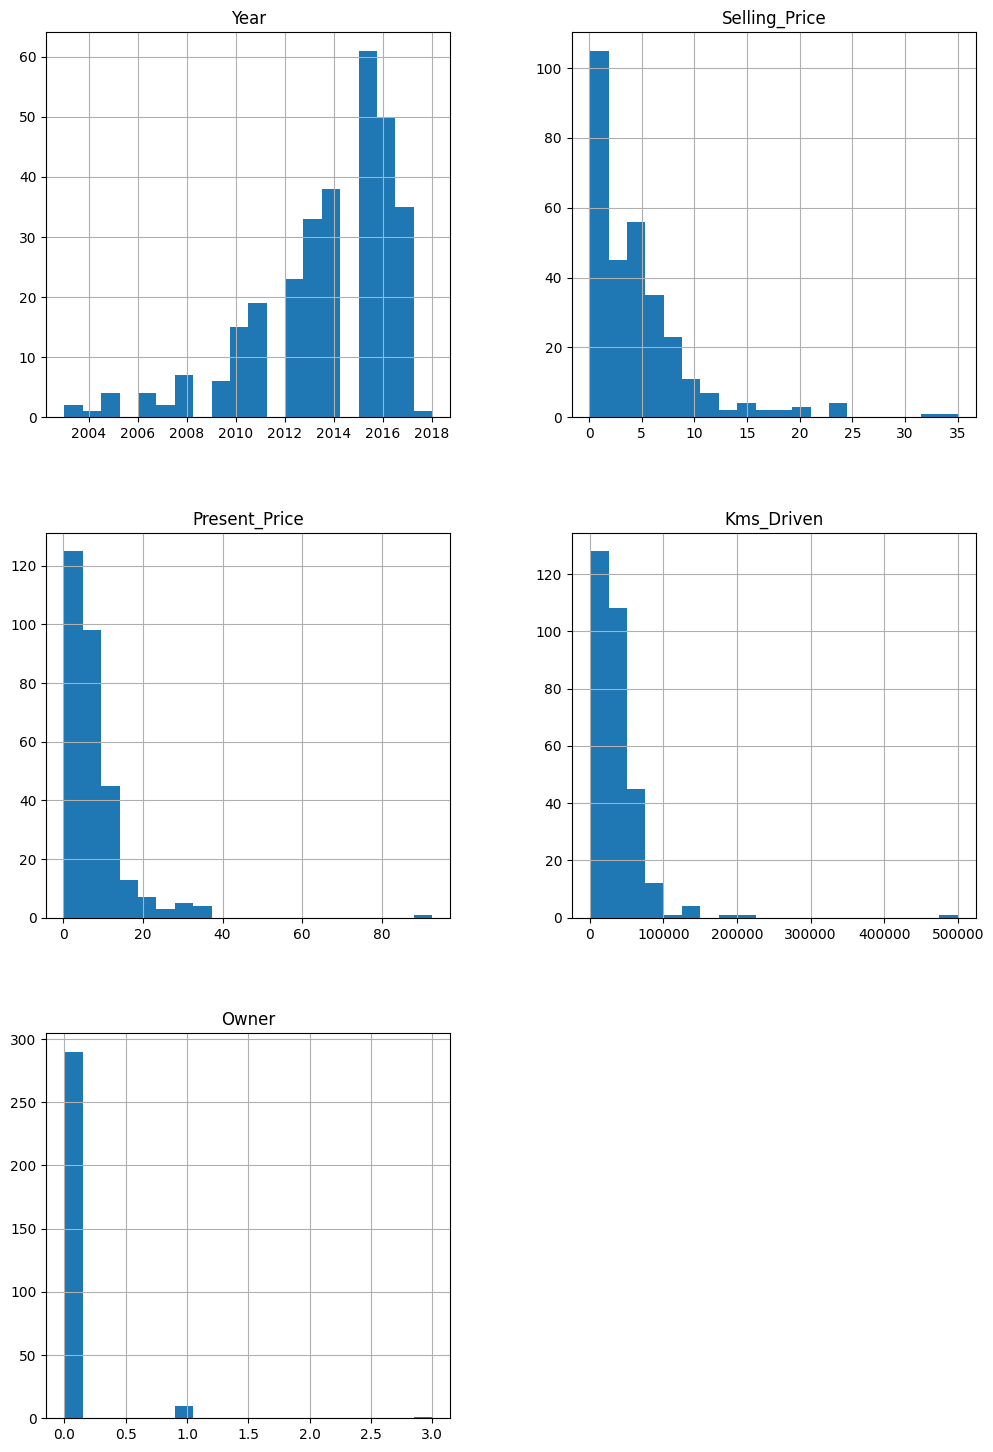

In [113]:
import matplotlib.pyplot as plt
car.hist(bins = 20,figsize=(12,18))
plt.show()

In [114]:
car["price_cat"] = pd.cut(
    car["Selling_Price"],
    bins=[0., 2.5, 5.0, 10.0, 15.0, np.inf],   # adjust ranges to your data
    labels=[1, 2, 3, 4, 5]
)


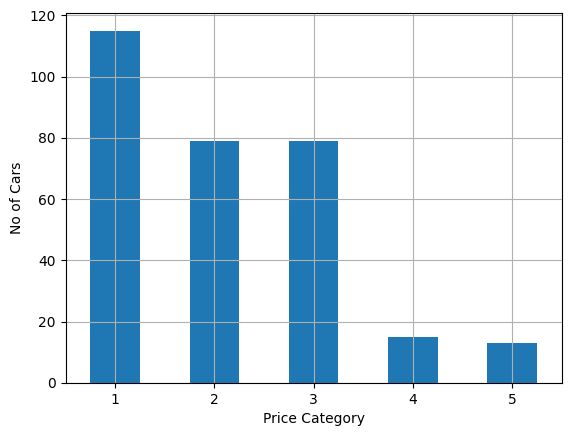

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

car["price_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Price Category")
plt.ylabel("No of Cars")
plt.show()


In [116]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(car, car["price_cat"]):
    strat_train_set_n = car.iloc[train_index]
    strat_test_set_n = car.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n]) 


In [117]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    car, test_size=0.2, stratify=car["price_cat"], random_state=42)

In [118]:
# extra code â€“ computes the data for Figure 2â€“10

def price_cat_proportions(data):
    return car["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(car, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": price_cat_proportions(car),
    "Stratified %": price_cat_proportions(strat_test_set),
    "Random %": price_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Price Categeroy"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified %  Random %  Strat. Error %  \
Price Categeroy                                                      
1                    38.21        188.52    188.52          393.44   
2                    26.25        129.51    129.51          393.44   
3                    26.25        129.51    129.51          393.44   
4                     4.98         24.59     24.59          393.44   
5                     4.32         21.31     21.31          393.44   

                 Rand. Error %  
Price Categeroy                 
1                       393.44  
2                       393.44  
3                       393.44  
4                       393.44  
5                       393.44

In [119]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

In [120]:
car = strat_train_set.copy()

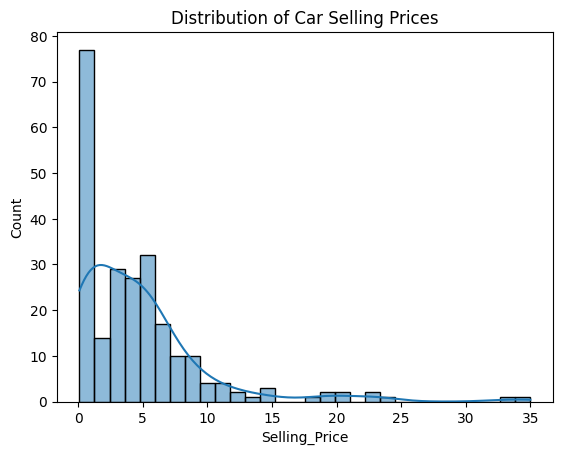

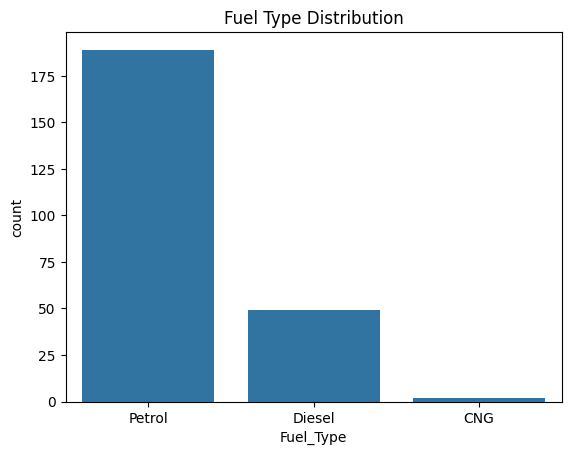

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(car["Selling_Price"], bins=30, kde=True)
plt.title("Distribution of Car Selling Prices")
plt.show()

# Fuel type counts
sns.countplot(x="Fuel_Type", data=car)
plt.title("Fuel Type Distribution")
plt.show()


here distribution of Selling_Price is heavily right-skewed, with most cars priced below 5 lakhs and a few expensive outliers above 20 lakhs. This suggests applying a log transformation on price to stabilize variance. Additionally, outliers (luxury cars) may need to be capped or treated separately to avoid distorting model performance.

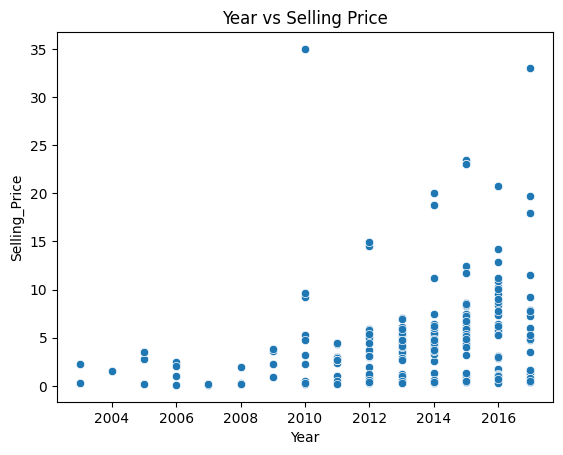

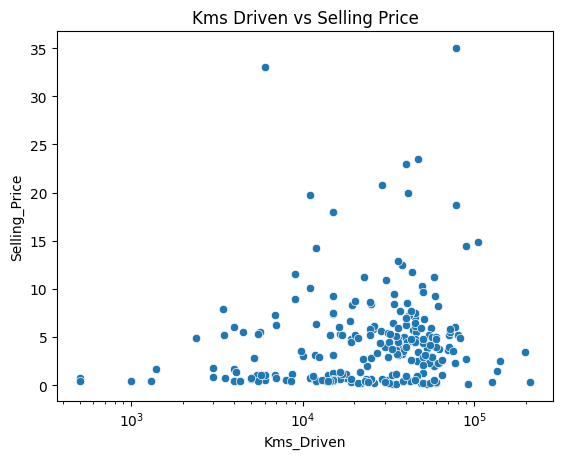

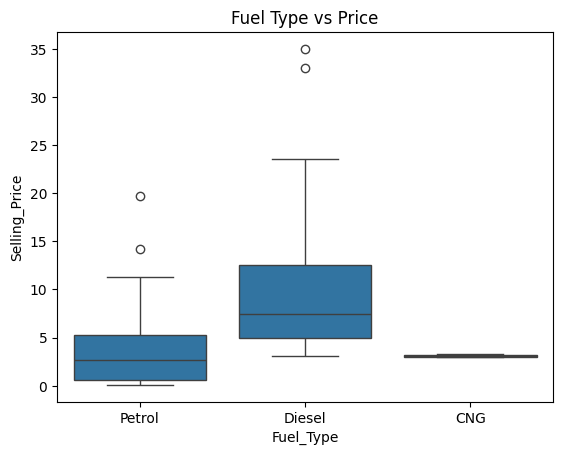

In [122]:
# Year vs Price
sns.scatterplot(x="Year", y="Selling_Price", data=car)
plt.title("Year vs Selling Price")
plt.show()

# Kms Driven vs Price (log scale)
sns.scatterplot(x="Kms_Driven", y="Selling_Price", data=car)
plt.xscale("log")
plt.title("Kms Driven vs Selling Price")
plt.show()

# Fuel Type vs Price
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=car)
plt.title("Fuel Type vs Price")
plt.show()


The scatter plot of Year vs Selling_Price shows that newer cars tend to sell at much higher prices than older cars, confirming that age is an important predictor of car price. There are some outliers, such as older cars (around 2010) with very high prices, which may represent rare luxury cars. To help the model, we can create a Car_Age feature and consider handling these outliers separately.

Univariate analysis (histograms, counts)

Understand distribution of each feature.

Bivariate analysis (scatterplots, boxplots)

Compare each feature with target (Selling_Price).

Check correlations (heatmaps for numeric features).

Decide actions:

Keep or drop feature?

Handle outliers?

Encode categorical features?

Create new features?

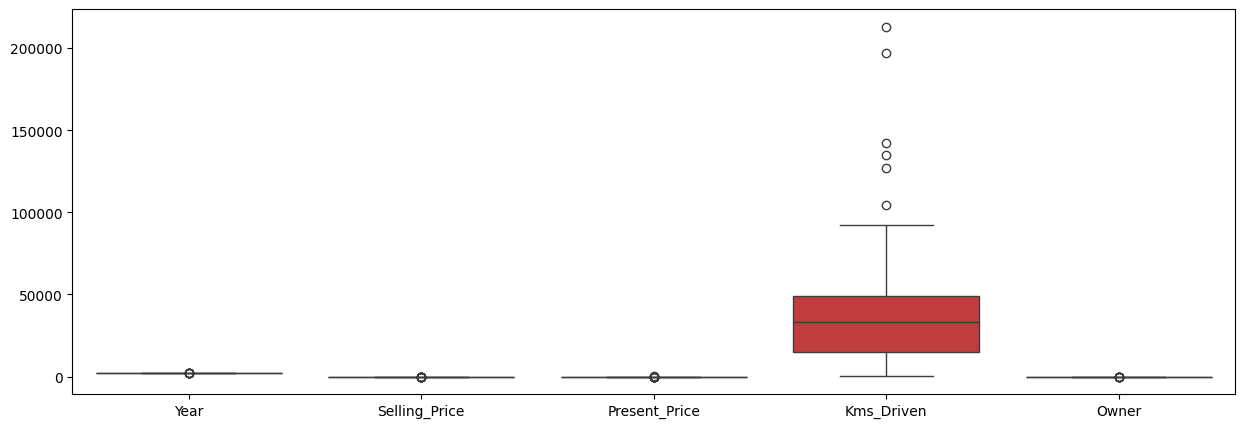

In [123]:
plt.figure(figsize = (15,5))
sns.boxplot(data=car)
plt.show()


In [124]:
q1 = car['Kms_Driven'].quantile(0.25)
q3 = car['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

34000.0 100000.0 -36000.0


Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

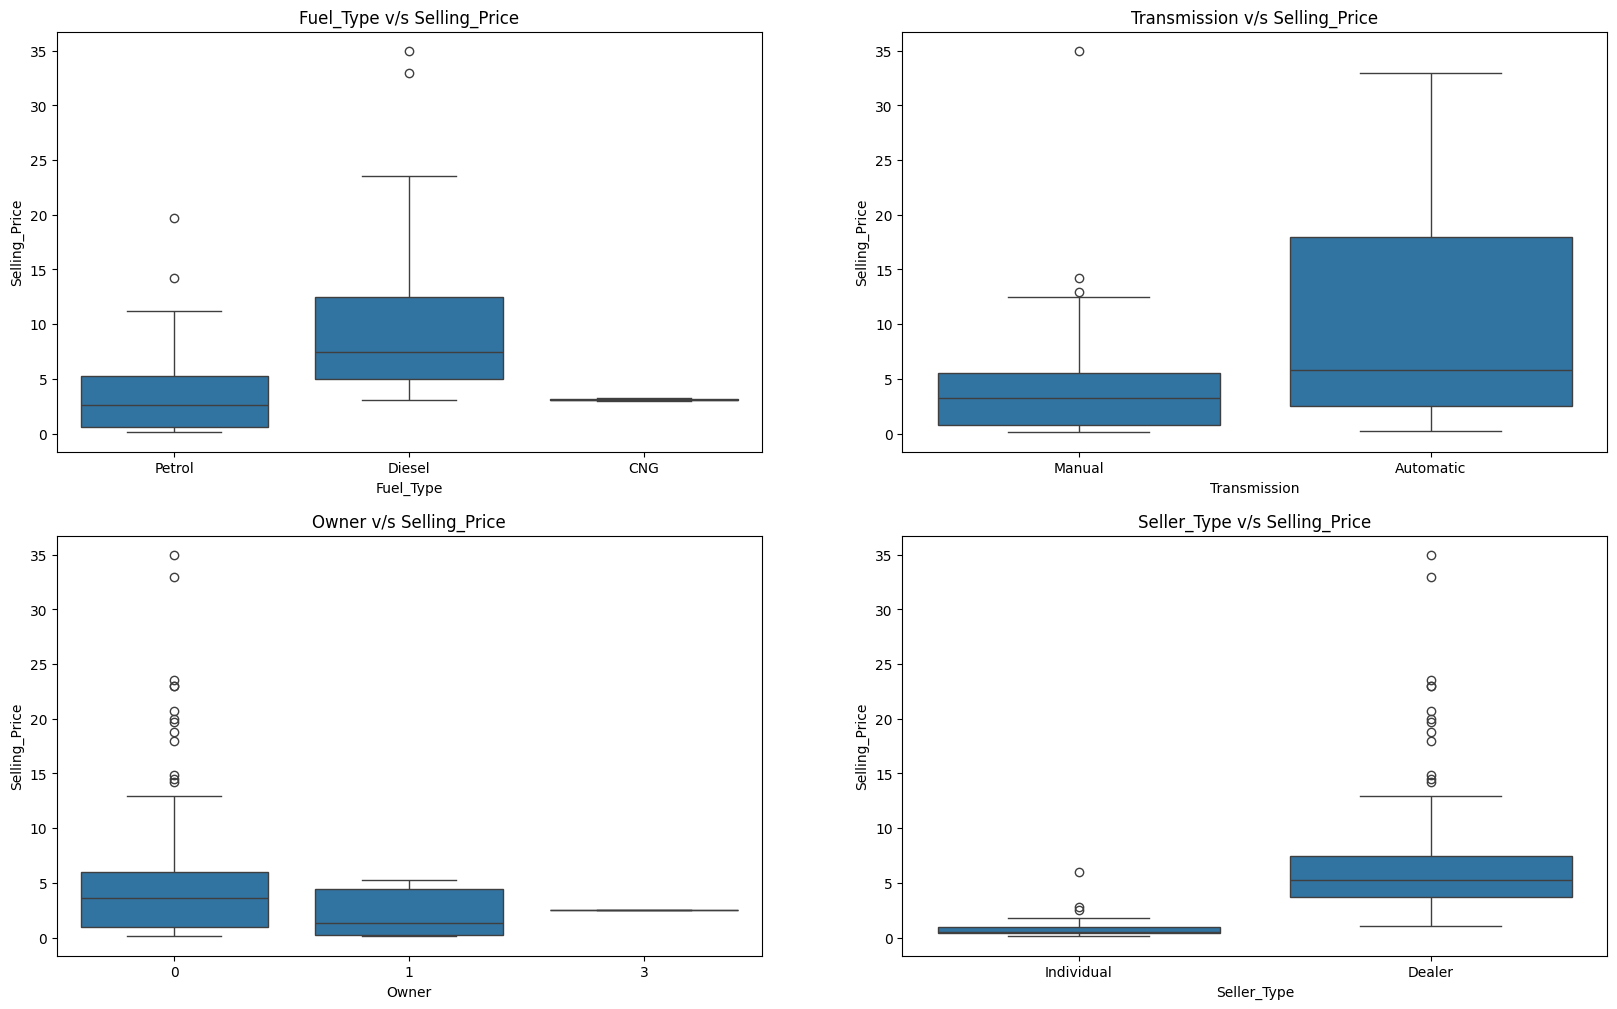

In [125]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=car.Fuel_Type,y=car.Selling_Price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=car.Transmission,y=car.Selling_Price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=car.Owner,y=car.Selling_Price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=car.Seller_Type,y=car.Selling_Price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

Boxplots show clear relationships between categorical variables and Selling Price. Diesel cars are generally more expensive than Petrol and CNG cars. Automatic cars are priced higher than Manual ones. Cars with fewer previous owners (0) and those sold by dealers also have higher prices. These features will be useful predictors. Some categories (CNG fuel, 3+ owners) are rare and may be merged during data preparation.

# LOOK FOR CO RERALTIONS 
+1 -> strong
-1-> weak
0 - > no (if non linear may be exists)

In [126]:
corr_matrix = car.corr(numeric_only=True)

In [127]:
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.885003
Year             0.207420
Kms_Driven       0.079277
Owner           -0.072256
Name: Selling_Price, dtype: float64

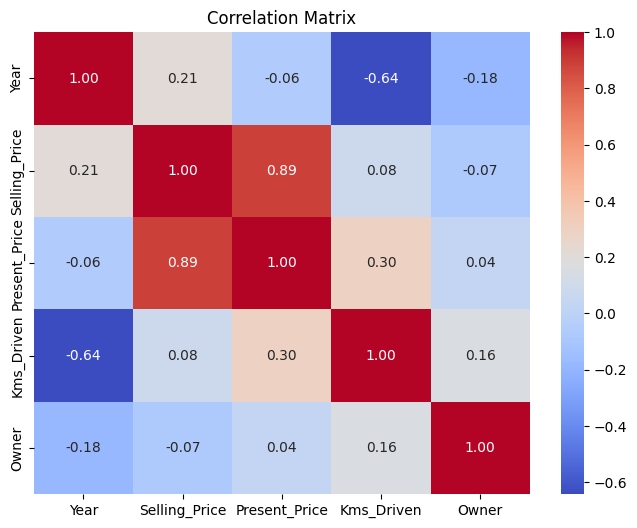

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [129]:
corr_spearman = car.corr(method="spearman", numeric_only=True)

In [130]:
corr_spearman["Selling_Price"].sort_values(ascending = False)

Selling_Price    1.000000
Present_Price    0.907186
Year             0.252005
Kms_Driven       0.160714
Owner           -0.111756
Name: Selling_Price, dtype: float64

Use Pearson â†’ quick check for linear correlation.

Use Spearman â†’ captures monotonic (non-linear) patterns.

Use Mutual Information â†’ finds any type of dependency.

In [131]:
car["Car_Age"] = 2025 - car["Year"]


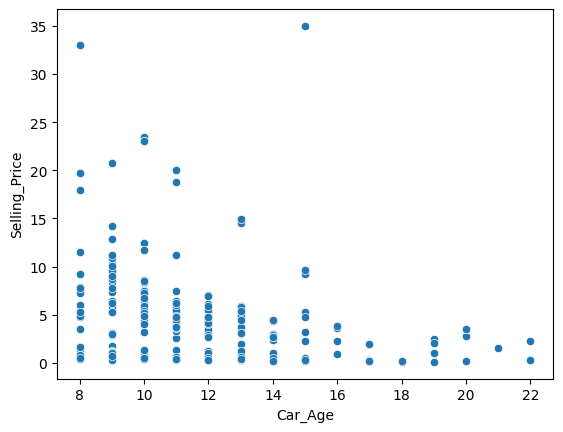

In [132]:
sns.scatterplot(x="Car_Age", y="Selling_Price", data=car)
plt.show()


In [133]:
car["Kms_per_Year"] = car["Kms_Driven"] / (car["Car_Age"] + 1)


In [134]:
car[["Kms_per_Year","Selling_Price"]].corr()


Kms_per_Year  Selling_Price
Kms_per_Year       1.000000       0.196553
Selling_Price      0.196553       1.000000

In [135]:
car["Depreciation_Ratio"] = car["Selling_Price"] / car["Present_Price"]


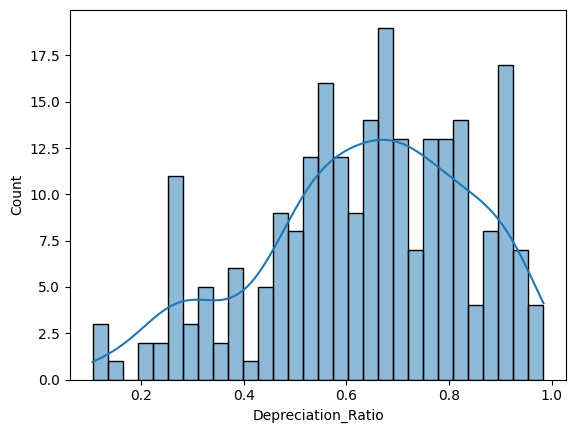

In [136]:
sns.histplot(car["Depreciation_Ratio"], bins=30, kde=True)
plt.show()


In [137]:
car["Multiple_Owners"] = (car["Owner"] > 1).astype(int)


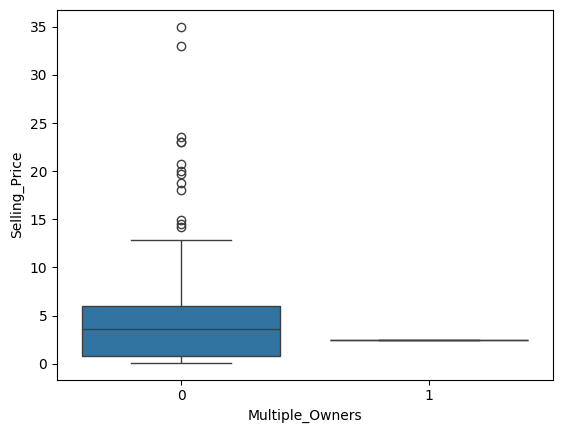

In [138]:
sns.boxplot(x="Multiple_Owners", y="Selling_Price", data=car)
plt.show()


In [139]:
corr_spearman = car.corr(method="spearman", numeric_only=True)

In [140]:
corr_spearman["Selling_Price"].sort_values(ascending = False)

Selling_Price         1.000000
Present_Price         0.907186
Kms_per_Year          0.287441
Year                  0.252005
Depreciation_Ratio    0.242303
Kms_Driven            0.160714
Multiple_Owners      -0.026611
Owner                -0.111756
Car_Age              -0.252005
Name: Selling_Price, dtype: float64

In [141]:
car = car.copy() 

In [142]:
for col in ['Year','Selling_Price','Present_Price','Kms_Driven','Owner']:
    if col in car.columns:
        car[col] = pd.to_numeric(car[col], errors='coerce')

num_cols = car.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)


Numeric columns: ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Kms_per_Year', 'Depreciation_Ratio', 'Multiple_Owners']


In [143]:
print(car[num_cols].info())
print(car[num_cols].describe().T)
print("\nMissing counts:\n", car[num_cols].isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 199 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                240 non-null    int64  
 1   Selling_Price       240 non-null    float64
 2   Present_Price       240 non-null    float64
 3   Kms_Driven          240 non-null    int64  
 4   Owner               240 non-null    int64  
 5   Car_Age             240 non-null    int64  
 6   Kms_per_Year        240 non-null    float64
 7   Depreciation_Ratio  240 non-null    float64
 8   Multiple_Owners     240 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 18.8 KB
None
                    count          mean           std          min  \
Year                240.0   2013.579167      2.946167  2003.000000   
Selling_Price       240.0      4.636333      5.173506     0.100000   
Present_Price       240.0      7.665679      9.083511     0.470000   
Kms_Driven          240.

In [144]:
current_year = 2025
if 'Year' in car.columns:
    car.loc[(car['Year'] > current_year) | (car['Year'] < 1900), 'Year'] = np.nan

if 'Kms_Driven' in car.columns:
    car.loc[car['Kms_Driven'] < 0, 'Kms_Driven'] = np.nan

if 'Present_Price' in car.columns:
    car.loc[car['Present_Price'] <= 0, 'Present_Price'] = np.nan

if 'Selling_Price' in car.columns:
    car.loc[car['Selling_Price'] <= 0, 'Selling_Price'] = np.nan


In [145]:
medians = car[num_cols].median()
car[num_cols] = car[num_cols].fillna(medians)


In [146]:
def iqr_cap(df, cols):
    df = df.copy()
    for c in cols:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        low = Q1 - 1.5 * IQR
        high = Q3 + 1.5 * IQR
        df[c] = df[c].clip(lower=low, upper=high)
    return df

num_clean_iqr = iqr_cap(car[num_cols], num_cols)


In [147]:
def percentile_cap(df, cols, low_p=0.01, high_p=0.99):
    df = df.copy()
    for c in cols:
        low = df[c].quantile(low_p)
        high = df[c].quantile(high_p)
        df[c] = df[c].clip(lower=low, upper=high)
    return df

num_clean_pct = percentile_cap(car[num_cols], num_cols, low_p=0.01, high_p=0.99)


                    count          mean           std          min  \
Year                240.0   2013.592375      2.901578  2004.390000   
Selling_Price       240.0      4.546778      4.734540     0.153900   
Present_Price       240.0      7.428721      7.453415     0.510000   
Kms_Driven          240.0  35035.117417  25975.942072  1117.000000   
Owner               240.0      0.033333      0.179881     0.000000   
Car_Age             240.0     11.407625      2.901578     8.000000   
Kms_per_Year        240.0   2665.866184   1607.479982   117.333333   
Depreciation_Ratio  240.0      0.638416      0.201889     0.141202   
Multiple_Owners     240.0      0.000000      0.000000     0.000000   

                             25%           50%           75%            max  
Year                 2012.000000   2014.000000   2016.000000    2017.000000  
Selling_Price           0.875000      3.555000      5.950000      23.305000  
Present_Price           1.245000      5.935000      9.400000     

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>,
        <Axes: title={'center': 'Present_Price'}>],
       [<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Owner'}>,
        <Axes: title={'center': 'Car_Age'}>],
       [<Axes: title={'center': 'Kms_per_Year'}>,
        <Axes: title={'center': 'Depreciation_Ratio'}>,
        <Axes: title={'center': 'Multiple_Owners'}>]], dtype=object)

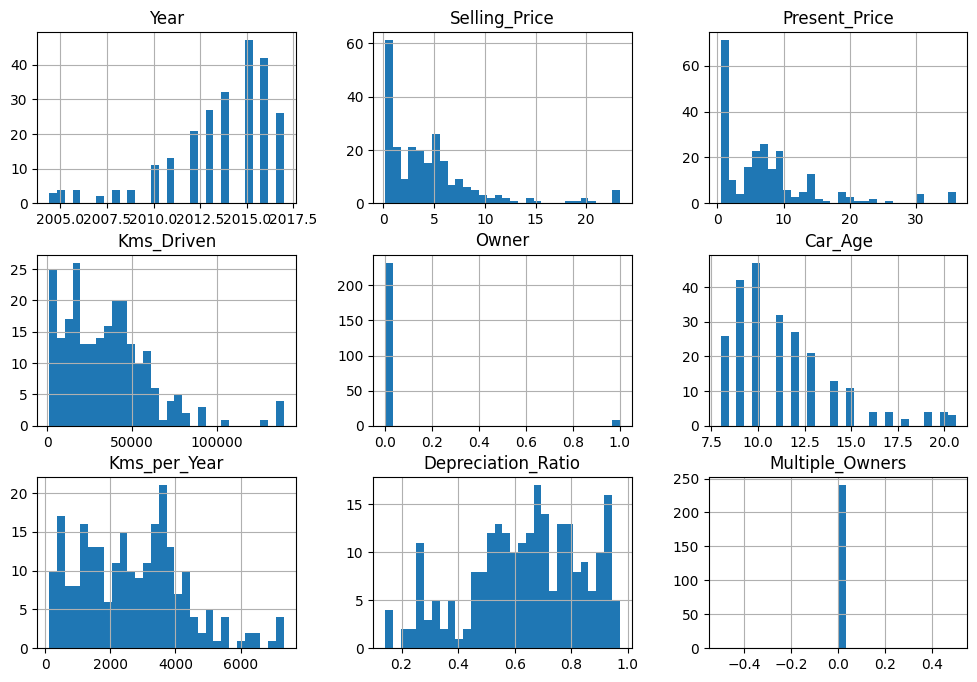

In [148]:
# choose the cleaned dataframe you used above, e.g. num_clean = num_clean_pct
num_clean = num_clean_pct

print(num_clean.describe().T)
num_clean.hist(bins=30, figsize=(12,8))


In [149]:
# Count missing values in each column
car.isna().sum()
(car.isna().mean() * 100).round(2)


Car_Name              0.0
Year                  0.0
Selling_Price         0.0
Present_Price         0.0
Kms_Driven            0.0
Fuel_Type             0.0
Seller_Type           0.0
Transmission          0.0
Owner                 0.0
Car_Age               0.0
Kms_per_Year          0.0
Depreciation_Ratio    0.0
Multiple_Owners       0.0
dtype: float64

In [150]:
car.describe().T


count          mean           std          min  \
Year                240.0   2013.579167      2.946167  2003.000000   
Selling_Price       240.0      4.636333      5.173506     0.100000   
Present_Price       240.0      7.665679      9.083511     0.470000   
Kms_Driven          240.0  35588.595833  28786.793318   500.000000   
Owner               240.0      0.041667      0.255347     0.000000   
Car_Age             240.0     11.420833      2.946167     8.000000   
Kms_per_Year        240.0   2699.346200   1753.078552    50.000000   
Depreciation_Ratio  240.0      0.638275      0.202769     0.105352   
Multiple_Owners     240.0      0.004167      0.064550     0.000000   

                             25%           50%           75%            max  
Year                 2012.000000   2014.000000   2016.000000    2017.000000  
Selling_Price           0.875000      3.555000      5.950000      35.000000  
Present_Price           1.245000      5.935000      9.400000      92.600000  
Kms_Driven          15000.000000  33000.000000  49000.000000  213000.000000  
Owner                   0.000000      0.000000      0.000000       3.000000  
Car_Age                 9.000000     11.000000     13.000000      22.000000  
Kms_per_Year         1362.012987   2559.496753   3667.917208   13312.500000  
Depreciation_Ratio      0.518488      0.660402      0.791332       0.984252  
Multiple_Owners         0.000000      0.000000      0.000000       1.000000

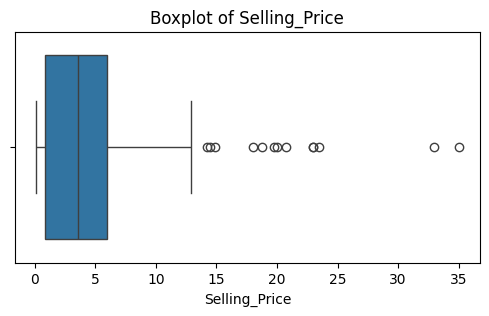

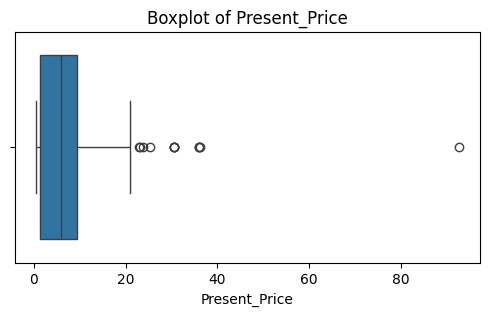

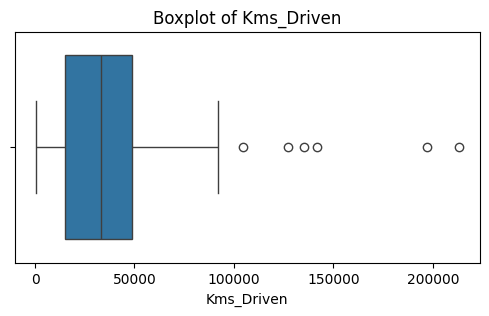

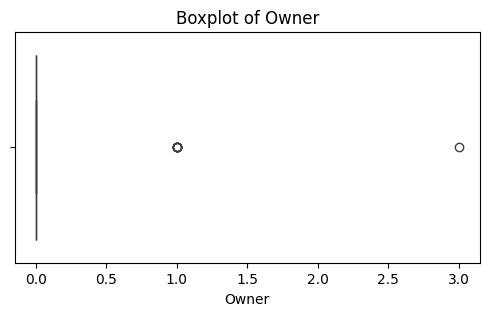

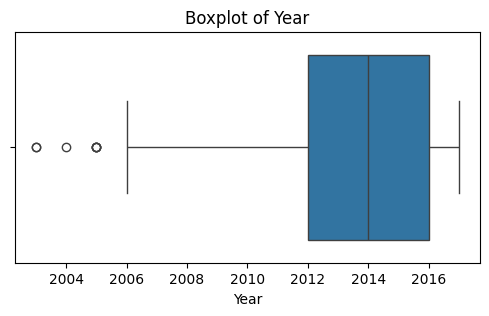

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Year']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=car[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [152]:
from sklearn.preprocessing import OneHotEncoder

In [153]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

car_encoded = encoder.fit_transform(car[cat_cols])

# Get feature names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# Convert back to DataFrame
car_encoded_df = pd.DataFrame(car_encoded, columns=encoded_cols, index=car.index)

print(car_encoded_df.head())


     Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
199               0.0               1.0                     1.0   
261               0.0               1.0                     0.0   
36                0.0               1.0                     0.0   
296               1.0               0.0                     0.0   
137               0.0               1.0                     1.0   

     Transmission_Manual  Owner_1  Owner_3  
199                  1.0      0.0      0.0  
261                  1.0      0.0      0.0  
36                   1.0      0.0      0.0  
296                  1.0      0.0      0.0  
137                  1.0      0.0      0.0  


In [154]:
car_num = car[num_cols]
car_cat = car[cat_cols]

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [157]:
housing_num_min_max_scaler=min_max_scaler.fit_transform(car_num)

In [158]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# If price_bin / price_cat not present, create simple bins (adjust edges to your data)
if 'price_cat' not in car.columns:
    car['price_cat'] = pd.cut(car['Selling_Price'],
                              bins=[0., 2.5, 5.0, 10.0, 15.0, np.inf],
                              labels=[1,2,3,4,5])

# Stratified split (safe reproducible)
train_set, test_set = train_test_split(car, test_size=0.20,
                                       stratify=car['price_cat'],
                                       random_state=42)

# Remove helper column if present (we won't use it in model)
for df in (train_set, test_set):
    df.drop(columns=['price_cat'], inplace=True, errors='ignore')

# Add simple derived numeric attributes (safe â€” uses only input columns, no label leakage)
CURRENT_YEAR = 2025
for df in (train_set, test_set):
    df['Car_Age'] = CURRENT_YEAR - df['Year']
    df['Kms_per_Year'] = df['Kms_Driven'] / (df['Car_Age'].clip(lower=0) + 1)

# Separate X / y
X_train = train_set.drop(columns=['Selling_Price'])
y_train = train_set['Selling_Price'].copy()
X_test  = test_set.drop(columns=['Selling_Price'])
y_test  = test_set['Selling_Price'].copy()

# Choose numeric & categorical columns for the pipelines
num_attribs = ['Present_Price', 'Kms_Driven', 'Car_Age', 'Kms_per_Year']
cat_attribs = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']   # treat Owner as categorical


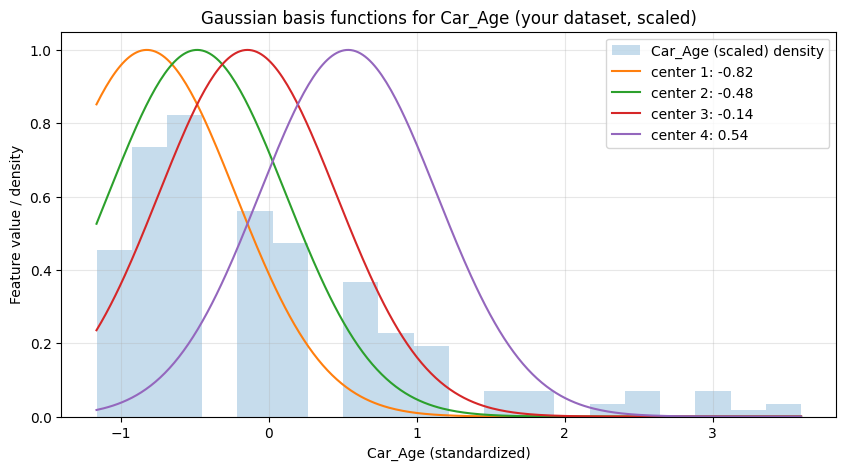

gauss_c1  gauss_c2  gauss_c3  gauss_c4
199  0.000002  0.000034  0.000381  0.018006
261  1.000000  0.851563  0.525857  0.076466
36   0.851563  1.000000  0.851563  0.235479
296  1.000000  0.851563  0.525857  0.076466
137  0.235479  0.525857  0.851563  0.851563

Transformed gaussian feature matrix shape: (240, 4)


In [159]:
# Run this in your notebook (where 'car' DataFrame is loaded)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# --- 0. Make sure Car_Age exists (create from Year if not)
CURRENT_YEAR = 2025
if 'Car_Age' not in car.columns:
    if 'Year' in car.columns:
        car = car.copy()
        car['Car_Age'] = CURRENT_YEAR - car['Year']
    else:
        raise KeyError("No 'Car_Age' or 'Year' column found in 'car' DataFrame.")

# --- 1. Prepare Car_Age array: impute median, then scale
col = 'Car_Age'
X_col = car[[col]].copy()

imp = SimpleImputer(strategy='median')
X_imp = imp.fit_transform(X_col)        # shape (n_samples, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp).ravel()  # 1D array of standardized Car_Age

# --- 2. Simple Gaussian-basis transformer for a single column
class GaussianFeaturesSimple:
    def __init__(self, n_centers=4, sigma_scale=1.0):
        self.n_centers = int(n_centers)
        self.sigma_scale = float(sigma_scale)
    def fit(self, X):
        X = np.asarray(X).ravel()
        quantiles = np.linspace(0, 1, self.n_centers + 2)[1:-1]
        self.centers_ = np.quantile(X, quantiles)
        sigma = np.std(X)
        if sigma <= 0:
            sigma = 1.0
        self.sigma_ = sigma * self.sigma_scale
        return self
    def transform(self, X):
        X = np.asarray(X).ravel()
        out = []
        for c in self.centers_:
            out.append(np.exp(-((X - c) ** 2) / (2.0 * (self.sigma_ ** 2))))
        return np.vstack(out).T

# --- 3. Fit and transform
n_centers = 4                # try 3..6; more centers = more features
sigma_scale = 0.6            # try 0.3..1.0
gauss = GaussianFeaturesSimple(n_centers=n_centers, sigma_scale=sigma_scale)
gauss.fit(X_scaled)
X_gauss = gauss.transform(X_scaled)   # shape (n_samples, n_centers)

# --- 4. Plot scaled data histogram and Gaussian bumps
xs = np.linspace(X_scaled.min(), X_scaled.max(), 300)
plt.figure(figsize=(10,5))
plt.hist(X_scaled, bins=20, density=True, alpha=0.25, label='Car_Age (scaled) density')
for idx, c in enumerate(gauss.centers_):
    ys = np.exp(-((xs - c) ** 2) / (2 * (gauss.sigma_ ** 2)))
    plt.plot(xs, ys, label=f'center {idx+1}: {c:.2f}')
plt.title("Gaussian basis functions for Car_Age (your dataset, scaled)")
plt.xlabel("Car_Age (standardized)")
plt.ylabel("Feature value / density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 5. Show the transformed features (first rows) and shape
df_gauss = pd.DataFrame(X_gauss, columns=[f'gauss_c{i+1}' for i in range(X_gauss.shape[1])], index=car.index)
display(df_gauss.head())
print("Transformed gaussian feature matrix shape:", X_gauss.shape)


In [160]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """
    Sklearn-compatible Gaussian basis transformer.
    Creates n_centers gaussian bumps per numeric feature.
    """
    def __init__(self, n_centers=4, sigma_scale=1.0):
        self.n_centers = int(n_centers)
        self.sigma_scale = float(sigma_scale)

    def fit(self, X, y=None):
        X = np.asarray(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        n_features = X.shape[1]
        self.centers_ = []
        self.sigmas_ = []
        quantiles = np.linspace(0, 1, self.n_centers + 2)[1:-1]
        for j in range(n_features):
            col = X[:, j]
            centers = np.quantile(col, quantiles)
            self.centers_.append(centers)
            sigma = np.std(col)
            if sigma <= 0:
                sigma = 1.0
            self.sigmas_.append(sigma * self.sigma_scale)
        return self

    def transform(self, X):
        X = np.asarray(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        out_cols = []
        for j in range(X.shape[1]):
            centers = self.centers_[j]
            sigma = self.sigmas_[j]
            col = X[:, j]
            for c in centers:
                out_cols.append(np.exp(-((col - c) ** 2) / (2.0 * (sigma ** 2))))
        if len(out_cols) == 0:
            return np.zeros((X.shape[0], 0))
        return np.vstack(out_cols).T


In [161]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

# numeric features
num_cols_gauss = ['Car_Age', 'Kms_Driven']          # Gaussian
num_cols_simple = ['Present_Price', 'Kms_per_Year'] # simple scaling
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [162]:
# Gaussian pipeline (impute â†’ scale â†’ gaussian)
gauss_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
    ('gauss', GaussianFeatures(n_centers=4, sigma_scale=0.6))  # our custom class
])

# Simple numeric pipeline (impute â†’ log+scale or just scale)
simple_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [163]:
full_pipeline = ColumnTransformer([
    ('gauss', gauss_pipeline, num_cols_gauss),
    ('num', simple_num_pipeline, num_cols_simple),
    ('cat', cat_pipeline, cat_cols)
])


In [164]:
# Apply on training data
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared  = full_pipeline.transform(X_test)

print("Train shape:", X_train_prepared.shape)
print("Test shape:", X_test_prepared.shape)


Train shape: (192, 20)
Test shape: (48, 20)


In [165]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# 1) Baseline pipeline (no gaussian) -> simple numeric + cat OHE
baseline_pipeline = ColumnTransformer([
    ('num', Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())]), 
     ['Present_Price','Kms_Driven','Car_Age','Kms_per_Year']),
    ('cat', cat_pipeline, cat_cols)
])
pipe_baseline = Pipeline([('pre', baseline_pipeline), ('model', Ridge(alpha=1.0))])
pipe_baseline.fit(X_train, y_train)
pred_base = pipe_baseline.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, pred_base))

# 2) Gaussian pipeline (what you already built: full_pipeline)
pipe_gauss = Pipeline([('pre', full_pipeline), ('model', Ridge(alpha=1.0))])
pipe_gauss.fit(X_train, y_train)
pred_gauss = pipe_gauss.predict(X_test)
rmse_gauss = np.sqrt(mean_squared_error(y_test, pred_gauss))

print(f"RMSE baseline (no gauss): {rmse_base:.4f}")
print(f"RMSE with gaussian features: {rmse_gauss:.4f}")


RMSE baseline (no gauss): 2.0628
RMSE with gaussian features: 2.1106


In [166]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

# Columns
num_cols = ['Present_Price', 'Kms_Driven', 'Car_Age', 'Kms_per_Year']
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Numeric pipeline (log for skewed features, then scale)
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=False)),  # log1p handles skew
    ('scale', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


# before log

array([[<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>]], dtype=object)

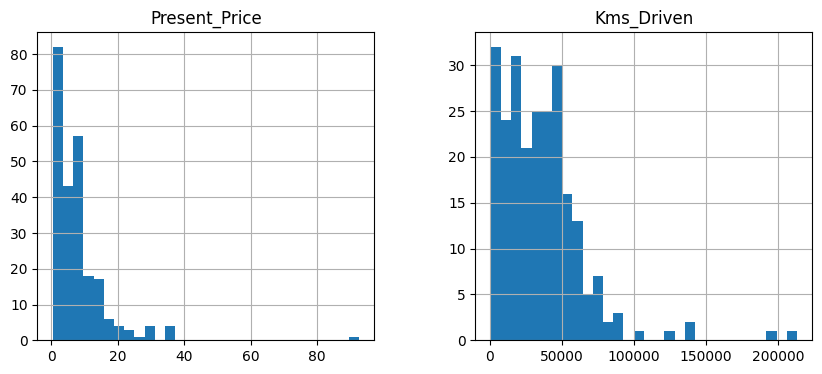

In [167]:
car[['Present_Price', 'Kms_Driven']].hist(bins=30, figsize=(10,4))


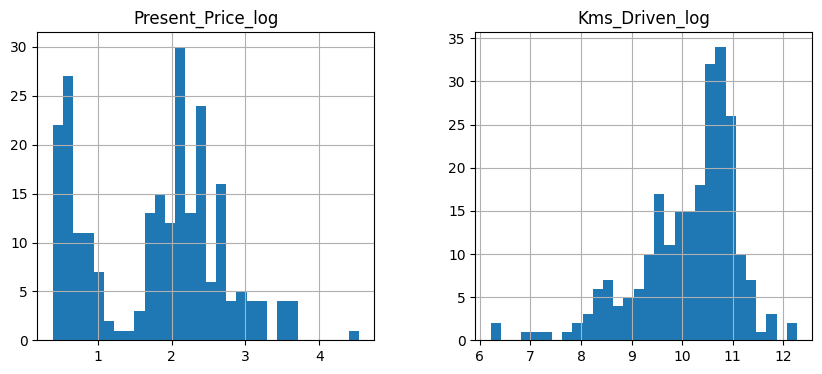

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# log1p = log(1 + x), safe for zero values
car['Present_Price_log'] = np.log1p(car['Present_Price'])
car['Kms_Driven_log']   = np.log1p(car['Kms_Driven'])

# plot transformed versions
car[['Present_Price_log', 'Kms_Driven_log']].hist(bins=30, figsize=(10,4))
plt.show()


In [169]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Define column groups
log_cols = ['Present_Price', 'Kms_Driven']
other_num_cols = ['Car_Age', 'Kms_per_Year']
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# ---------- Case 1: Baseline (no log) ----------
baseline_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

baseline_pipeline = ColumnTransformer([
    ('num', baseline_num_pipeline, log_cols + other_num_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_cols)
])

pipe_base = Pipeline([
    ('pre', baseline_pipeline),
    ('model', Ridge(alpha=1.0))
])

pipe_base.fit(X_train, y_train)
pred_base = pipe_base.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, pred_base))

# ---------- Case 2: With log transform ----------
log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scale', StandardScaler())
])

simple_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

log_full_pipeline = ColumnTransformer([
    ('log', log_pipeline, log_cols),
    ('num', simple_pipeline, other_num_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_cols)
])

pipe_log = Pipeline([
    ('pre', log_full_pipeline),
    ('model', Ridge(alpha=1.0))
])

pipe_log.fit(X_train, y_train)
pred_log = pipe_log.predict(X_test)
rmse_log = np.sqrt(mean_squared_error(y_test, pred_log))

# ---------- Compare ----------
print(f"RMSE baseline (no log): {rmse_base:.4f}")
print(f"RMSE with log transform: {rmse_log:.4f}")


RMSE baseline (no log): 2.0628
RMSE with log transform: 2.5921


In [170]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

# Columns
num_cols = ['Present_Price', 'Kms_Driven', 'Car_Age', 'Kms_per_Year']
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Numeric pipeline (log for skewed features, then scale)
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=False)),  # log1p handles skew
    ('scale', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [171]:
from sklearn.preprocessing import PolynomialFeatures

# ---------- Case 1: Baseline ----------
baseline_pipeline = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), ['Present_Price','Kms_Driven','Car_Age','Kms_per_Year']),
    
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
])

pipe_base = Pipeline([
    ('pre', baseline_pipeline),
    ('model', Ridge(alpha=1.0))
])

pipe_base.fit(X_train, y_train)
pred_base = pipe_base.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, pred_base))

# ---------- Case 2: Polynomial ----------
poly_pipeline = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), ['Present_Price','Kms_Driven','Car_Age','Kms_per_Year']),
    
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
])

pipe_poly = Pipeline([
    ('pre', poly_pipeline),
    ('model', Ridge(alpha=1.0))
])

pipe_poly.fit(X_train, y_train)
pred_poly = pipe_poly.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, pred_poly))

# ---------- Compare ----------
print(f"RMSE baseline (no poly): {rmse_base:.4f}")
print(f"RMSE with polynomial features: {rmse_poly:.4f}")


RMSE baseline (no poly): 2.0628
RMSE with polynomial features: 0.6703


In [172]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Columns
num_cols = ['Present_Price','Kms_Driven','Car_Age','Kms_per_Year']
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Baseline (degree=2 for comparison)
poly2_pipeline = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), num_cols),
    
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_cols)
])

pipe_poly2 = Pipeline([
    ('pre', poly2_pipeline),
    ('model', Ridge(alpha=1.0))
])

pipe_poly2.fit(X_train, y_train)
pred_poly2 = pipe_poly2.predict(X_test)
rmse_poly2 = np.sqrt(mean_squared_error(y_test, pred_poly2))

# New: Polynomial degree=3
poly3_pipeline = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3, include_bias=False))
    ]), num_cols),
    
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_cols)
])

pipe_poly3 = Pipeline([
    ('pre', poly3_pipeline),
    ('model', Ridge(alpha=1.0))
])

pipe_poly3.fit(X_train, y_train)
pred_poly3 = pipe_poly3.predict(X_test)
rmse_poly3 = np.sqrt(mean_squared_error(y_test, pred_poly3))

# Compare
print(f"RMSE with polynomial degree=2: {rmse_poly2:.4f}")
print(f"RMSE with polynomial degree=3: {rmse_poly3:.4f}")


RMSE with polynomial degree=2: 0.6703
RMSE with polynomial degree=3: 1.7860


In [173]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Final columns
num_cols = ['Present_Price','Kms_Driven','Car_Age','Kms_per_Year']
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Final preprocessing pipeline
full_pipeline = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), num_cols),
    
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_cols)
])


# Custom Transformers


In [174]:
from sklearn.base import BaseEstimator, TransformerMixin

class CarCustomFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        # Avoid divide-by-zero with Car_Age=0
        X_new['Kms_per_Year'] = X_new['Kms_Driven'] / (X_new['Car_Age'] + 1)
        # If Present_Price is in dataset
        if 'Present_Price' in X_new.columns and 'Selling_Price' in X_new.columns:
            X_new['Depreciation_Ratio'] = X_new['Selling_Price'] / (X_new['Present_Price'] + 1e-6)
        return X_new


In [175]:
from sklearn.pipeline import Pipeline

# Add custom step before preprocessing
pipe_custom = Pipeline([
    ('custom', CarCustomFeatures()),   # add new features
    ('pre', full_pipeline),           # your preprocessing pipeline with poly=2
    ('model', Ridge(alpha=1.0))       # example model
])

pipe_custom.fit(X_train, y_train)
pred = pipe_custom.predict(X_test)

rmse_custom = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE with custom features + polynomial pipeline:", rmse_custom)


RMSE with custom features + polynomial pipeline: 0.6703489901357296


In [176]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Kms per Year = Kms_Driven / (Car_Age + 1)
def kms_per_year(X):
    return X[:, [0]] / (X[:, [1]] + 1)  # avoid divide-by-zero

def kms_per_year_name(transformer, feature_names_in):
    return ["Kms_per_Year"]

kms_per_year_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(kms_per_year, feature_names_out=kms_per_year_name),
    StandardScaler()
)

# 2. Depreciation Ratio = Selling_Price / Present_Price
def depreciation_ratio(X):
    return X[:, [0]] / (X[:, [1]] + 1e-6)  # safe divide

def depreciation_ratio_name(transformer, feature_names_in):
    return ["Depreciation_Ratio"]

depreciation_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(depreciation_ratio, feature_names_out=depreciation_ratio_name),
    StandardScaler()
)


In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Categorical pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# Default numeric pipeline (scale only)
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Final preprocessing: combine all
preprocessing = ColumnTransformer([
    # Ratios
    ("kms_per_year", kms_per_year_pipeline, ["Kms_Driven", "Car_Age"]),
    ("depreciation", depreciation_pipeline, ["Selling_Price", "Present_Price"]),
    
    # Simple numeric
    ("num", num_pipeline, ["Car_Age", "Present_Price", "Kms_Driven"]),
    
    # Categorical
    ("cat", cat_pipeline, ["Fuel_Type", "Seller_Type", "Transmission", "Owner"])
])


# check the new features are good or not

In [178]:
# run once (assumes `car` DataFrame exists and has Car_Age created)
import numpy as np
import pandas as pd

car_fe = car.copy()   # work on a copy

# 1) Kms_per_Year (safe: +1 to avoid division by zero)
car_fe['Kms_per_Year'] = car_fe['Kms_Driven'] / (car_fe['Car_Age'] + 1)

# 2) Depreciation_Ratio (Selling / Present)
car_fe['Depreciation_Ratio'] = car_fe['Selling_Price'] / (car_fe['Present_Price'] + 1e-6)

# 3) Is_Multiple_Owners
car_fe['Is_Multiple_Owners'] = (car_fe['Owner'] > 1).astype(int)

# 4) Luxury_Flag (example threshold, tuneable)
lux_th = 10.0  # lakhs, adjust to your currency units
car_fe['Luxury_Flag'] = (car_fe['Present_Price'] > lux_th).astype(int)

# 5) Car_Age_Bucket (categorical)
car_fe['Car_Age_Bucket'] = pd.cut(car_fe['Car_Age'], bins=[-1,2,7,100], labels=['New','Mid','Old'])

car_fe.head()


Car_Name    Year  Selling_Price  Present_Price  Kms_Driven  \
199  Honda CB Shine  2007.0           0.12          0.580     53000.0   
261            brio  2016.0           5.50          5.970      5600.0   
36            dzire  2015.0           4.65          7.200     48767.0   
296            city  2016.0           9.50         11.600     33988.0   
137    Hero Extreme  2013.0           0.65          0.787     16000.0   

    Fuel_Type Seller_Type Transmission  Owner  Car_Age  Kms_per_Year  \
199    Petrol  Individual       Manual      0       18   2789.473684   
261    Petrol      Dealer       Manual      0        9    560.000000   
36     Petrol      Dealer       Manual      0       10   4433.363636   
296    Diesel      Dealer       Manual      0        9   3398.800000   
137    Petrol  Individual       Manual      0       12   1230.769231   

     Depreciation_Ratio  Multiple_Owners price_cat  Present_Price_log  \
199            0.206896                0         1           0.457425   
261            0.921273                0         3           1.941615   
36             0.645833                0         2           2.104134   
296            0.818965                0         3           2.533697   
137            0.825920                0         1           0.580538   

     Kms_Driven_log  Is_Multiple_Owners  Luxury_Flag Car_Age_Bucket  
199       10.878066                   0            0            Old  
261        8.630700                   0            0            Old  
36        10.794830                   0            0            Old  
296       10.433792                   0            1            Old  
137        9.680406                   0            0            Old

In [179]:
# Quick numeric summary and NA check for the new features
fe_cols = ['Kms_per_Year','Depreciation_Ratio','Is_Multiple_Owners','Luxury_Flag']
print(car_fe[fe_cols].describe().T)
print("\nMissing counts:\n", car_fe[fe_cols].isna().sum())


                    count         mean          std        min          25%  \
Kms_per_Year        240.0  2699.346200  1753.078552  50.000000  1362.012987   
Depreciation_Ratio  240.0     0.638275     0.202768   0.105352     0.518487   
Is_Multiple_Owners  240.0     0.004167     0.064550   0.000000     0.000000   
Luxury_Flag         240.0     0.212500     0.409932   0.000000     0.000000   

                            50%          75%           max  
Kms_per_Year        2559.496753  3667.917208  13312.500000  
Depreciation_Ratio     0.660402     0.791332      0.984252  
Is_Multiple_Owners     0.000000     0.000000      1.000000  
Luxury_Flag            0.000000     0.000000      1.000000  

Missing counts:
 Kms_per_Year          0
Depreciation_Ratio    0
Is_Multiple_Owners    0
Luxury_Flag           0
dtype: int64


In [180]:
# Pearson (linear) and Spearman (rank / monotonic)
num_cols_for_corr = ['Present_Price','Kms_Driven','Car_Age','Kms_per_Year','Depreciation_Ratio','Is_Multiple_Owners']

pearson = car_fe[num_cols_for_corr + ['Selling_Price']].corr(method='pearson')['Selling_Price'].sort_values(ascending=False)
spearman = car_fe[num_cols_for_corr + ['Selling_Price']].corr(method='spearman')['Selling_Price'].sort_values(ascending=False)

print("Pearson correlations with Selling_Price:\n", pearson)
print("\nSpearman correlations with Selling_Price:\n", spearman)


Pearson correlations with Selling_Price:
 Selling_Price         1.000000
Present_Price         0.885003
Kms_per_Year          0.196553
Depreciation_Ratio    0.177947
Kms_Driven            0.079277
Is_Multiple_Owners   -0.026767
Car_Age              -0.207420
Name: Selling_Price, dtype: float64

Spearman correlations with Selling_Price:
 Selling_Price         1.000000
Present_Price         0.907186
Kms_per_Year          0.287441
Depreciation_Ratio    0.242969
Kms_Driven            0.160714
Is_Multiple_Owners   -0.026611
Car_Age              -0.252005
Name: Selling_Price, dtype: float64


In [181]:
from sklearn.feature_selection import mutual_info_regression

X = car_fe[num_cols_for_corr].fillna(0)   # MI requires numeric matrix, no NaNs
y = car_fe['Selling_Price'].values

mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information (higher = stronger non-linear dependence):\n", mi_series)


Mutual Information (higher = stronger non-linear dependence):
 Present_Price         1.313283
Car_Age               0.228080
Depreciation_Ratio    0.177951
Kms_Driven            0.140837
Kms_per_Year          0.062454
Is_Multiple_Owners    0.011095
dtype: float64


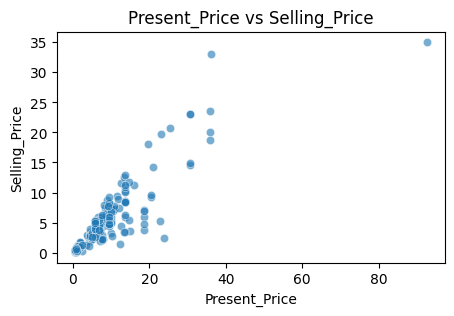

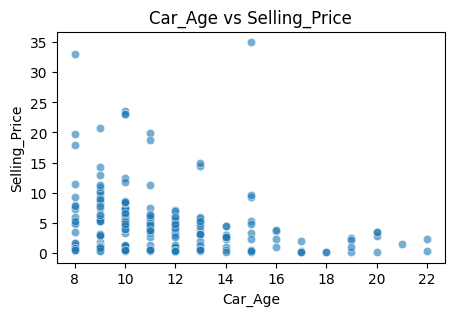

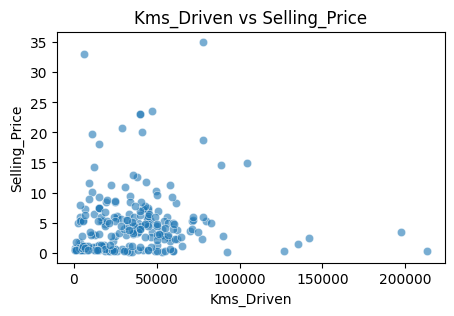

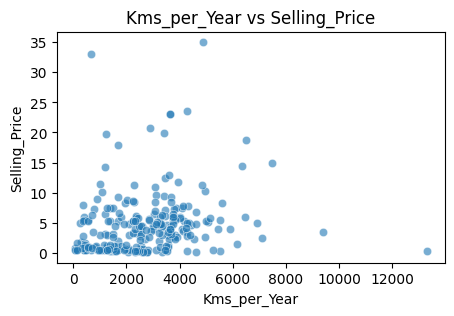

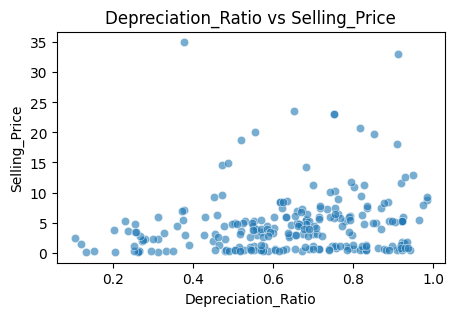

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Present_Price','Car_Age','Kms_Driven','Kms_per_Year','Depreciation_Ratio']:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=car_fe[col], y=car_fe['Selling_Price'], alpha=0.6)
    plt.title(f"{col} vs Selling_Price")
    plt.show()


In [183]:
# From the main dataset
if "Is_Multiple_Owners" in car.columns:
    car = car.drop(columns=["Is_Multiple_Owners"])

# From the feature-engineered copy
if "Is_Multiple_Owners" in car_fe.columns:
    car_fe = car_fe.drop(columns=["Is_Multiple_Owners"])


In [184]:
print("Main dataset columns:\n", car.columns.tolist())
print("\nFeature-engineered dataset columns:\n", car_fe.columns.tolist())


Main dataset columns:
 ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age', 'Kms_per_Year', 'Depreciation_Ratio', 'Multiple_Owners', 'price_cat', 'Present_Price_log', 'Kms_Driven_log']

Feature-engineered dataset columns:
 ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age', 'Kms_per_Year', 'Depreciation_Ratio', 'Multiple_Owners', 'price_cat', 'Present_Price_log', 'Kms_Driven_log', 'Luxury_Flag', 'Car_Age_Bucket']


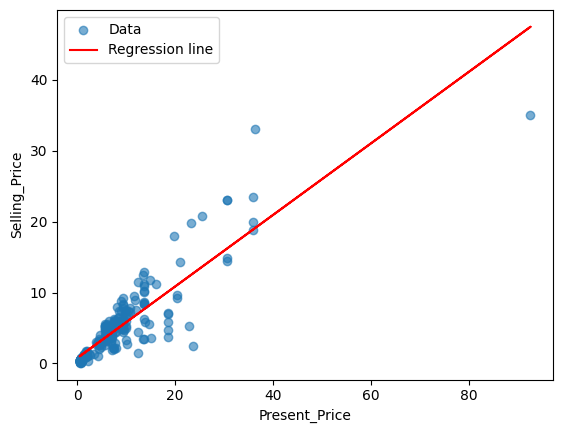

In [185]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = car[['Present_Price']].values
y = car['Selling_Price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, alpha=0.6, label="Data")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.legend()
plt.show()


In [186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Use your preprocessing pipeline (with feature engineering)
from sklearn.pipeline import Pipeline

tree_reg = Pipeline([
    ('pre', full_pipeline),  # your preprocessing
    ('model', DecisionTreeRegressor(random_state=42, max_depth=5))  # keep depth small first
])

# Train
tree_reg.fit(X_train, y_train)

# Predict
y_pred = tree_reg.predict(X_test)

# RMSE
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree RMSE:", rmse_tree)


Decision Tree RMSE: 2.1176093601964934


Basic with train but evalution using multiple steps


In [187]:
y_train_pred = tree_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE:", rmse_train)
print("Test RMSE :", rmse_tree)


Train RMSE: 0.9028208760787143
Test RMSE : 2.1176093601964934


In [188]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Run 5-fold cross-validation on training set
scores = cross_val_score(
    tree_reg,          # your DecisionTree pipeline from earlier
    X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)

# Convert to positive RMSE
rmse_scores = -scores

print("Fold RMSEs:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std deviation:", rmse_scores.std())

# Compare with earlier test set RMSE
print("\nTest set RMSE (previously computed):", rmse_tree)


Fold RMSEs: [3.48013435 5.38705933 2.46545417 1.43415139 1.99400544]
Mean RMSE: 2.9521609392805415
Std deviation: 1.390452050722675

Test set RMSE (previously computed): 2.1176093601964934


In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Build pipeline: preprocessing + Random Forest
forest_reg = Pipeline([
    ("pre", full_pipeline),
    ("model", RandomForestRegressor(
        n_estimators=200,   # number of trees
        random_state=42
    ))
])

# Run 5-fold CV
scores = cross_val_score(
    forest_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)

# Convert to positive RMSE
rmse_scores = -scores

print("Fold RMSEs:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std deviation:", rmse_scores.std())


Fold RMSEs: [3.6154419  2.3739055  1.18708456 0.86663494 1.79539854]
Mean RMSE: 1.9676930847201484
Std deviation: 0.972774259698702


In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR (RBF)": SVR(kernel='rbf', C=1.0, gamma='scale'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ("pre", full_pipeline),   # your preprocessing pipeline (poly=2, OHE, etc.)
        ("model", model)
    ])
    scores = cross_val_score(pipe, X_train, y_train,
                             scoring="neg_root_mean_squared_error",
                             cv=5,
                             n_jobs=-1)
    rmse_scores = -scores
    results[name] = {"Mean RMSE": rmse_scores.mean(), "Std Dev": rmse_scores.std()}

results_df = pd.DataFrame(results).T.sort_values("Mean RMSE")
print(results_df)


                  Mean RMSE   Std Dev
Ridge              1.231543  0.529203
LinearRegression   1.572410  0.989309
RandomForest       1.967693  0.972774
KNN                2.015185  0.540014
DecisionTree       2.694001  1.495308
SVR (RBF)          3.918875  0.817017


In [191]:
# Imports used below
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa (enables halving)
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
import numpy as np
from sklearn.metrics import mean_squared_error

# --- 1) Prepare pipeline variables (assumes `full_pipeline`, X_train, y_train, X_test, y_test exist)
# final pipeline structure we use in searches:
# Pipeline([('pre', full_pipeline), ('model', <estimator>)])


In [192]:
# Example: fine-grid for Ridge (low-cost)
ridge_pipe = Pipeline([('pre', full_pipeline), ('model', Ridge())])

ridge_param_grid = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_ridge = GridSearchCV(
    ridge_pipe,
    param_grid=ridge_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_ridge.fit(X_train, y_train)

print("Ridge best params:", grid_ridge.best_params_)
print("Ridge best CV RMSE:", -grid_ridge.best_score_)

# Evaluate on test set once
best_ridge = grid_ridge.best_estimator_
y_pred = best_ridge.predict(X_test)
print("Ridge test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Ridge best params: {'model__alpha': 1.0}
Ridge best CV RMSE: 1.2315426104400726
Ridge test RMSE: 0.6703489901357296


In [193]:
# Example: wide random search for RandomForest (cheap to evaluate many combos)
rf_pipe = Pipeline([('pre', full_pipeline), ('model', RandomForestRegressor(random_state=42))])

rf_param_dist = {
    'model__n_estimators': randint(50, 400),
    'model__max_depth': randint(3, 25),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 8),
    'model__max_features': ['sqrt', 'log2', None]
}

rand_rf = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_param_dist,
    n_iter=40,                      # try 40 random combos (adjust to time)
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rand_rf.fit(X_train, y_train)

print("RF best params:", rand_rf.best_params_)
print("RF best CV RMSE:", -rand_rf.best_score_)

best_rf = rand_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("RandomForest test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))



Fitting 5 folds for each of 40 candidates, totalling 200 fits
RF best params: {'model__max_depth': 7, 'model__max_features': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 9, 'model__n_estimators': 263}
RF best CV RMSE: 1.9486215316387274
RandomForest test RMSE: 2.008662736059651


In [194]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

# keep rf_param_dist including 'model__n_estimators' as you had it
halving_rf = HalvingRandomSearchCV(
    rf_pipe,
    param_distributions=rf_param_dist,  # includes model__n_estimators
    factor=3,
    # don't set resource explicitly
    max_resources=200,      # overall budget (used differently when resource='n_samples')
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
halving_rf.fit(X_train, y_train)
print("Best:", halving_rf.best_params_, "CV RMSE:", -halving_rf.best_score_)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 10
max_resources_: 200
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 10
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 30
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 90
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best: {'model__max_depth': 23, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 264} CV RMSE: 2.3570385816343724


In [195]:
# Replace `halving_rf` with the name of your HalvingRandomSearchCV object.
# If you used a different variable name, change it accordingly.

import numpy as np
from sklearn.metrics import mean_squared_error

# 1) Best params & CV score
print("Halving best params:", halving_rf.best_params_)
print("Halving best CV RMSE:", -halving_rf.best_score_)

# 2) Evaluate on test set
best_halving = halving_rf.best_estimator_
y_pred_test = best_halving.predict(X_test)
rmse_halving_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Halving test RMSE:", rmse_halving_test)

# 3) Optional: train RMSE (check overfitting)
y_pred_train = best_halving.predict(X_train)
rmse_halving_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Halving train RMSE:", rmse_halving_train)


Halving best params: {'model__max_depth': 23, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 264}
Halving best CV RMSE: 2.3570385816343724
Halving test RMSE: 1.627256625968315
Halving train RMSE: 1.1633273255593208


In [196]:
# rf_param_dist_no_n from earlier (ensure it does NOT include model__n_estimators)
rf_param_dist_no_n = {
    'model__max_depth': randint(3, 25),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 8),
    'model__max_features': ['sqrt', 'log2', None]
}

from sklearn.model_selection import HalvingRandomSearchCV
halving_rf2 = HalvingRandomSearchCV(
    rf_pipe,
    param_distributions=rf_param_dist_no_n,
    factor=3,
    resource='model__n_estimators',
    min_resources=10,
    max_resources=300,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
halving_rf2.fit(X_train, y_train)
print("Halving2 best params:", halving_rf2.best_params_, "CV RMSE:", -halving_rf2.best_score_)
print("Halving2 test RMSE:", np.sqrt(mean_squared_error(y_test, halving_rf2.best_estimator_.predict(X_test))))


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 300
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 30
n_resources: 10
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 1
n_candidates: 10
n_resources: 30
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 2
n_candidates: 4
n_resources: 90
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 270
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Halving2 best params: {'model__max_depth': 17, 'model__max_features': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6, 'model__n_estimators': 270} CV RMSE: 1.9479007421159007
Halving2 test RMSE: 1.976736575552172


In [197]:
import numpy as np
from scipy import stats

# Suppose you already have cross-val scores for Ridge
# (negative RMSE values from cross_val_score)
ridge_cv_scores = cross_val_score(
    best_ridge, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5
)
ridge_rmse_scores = -ridge_cv_scores

# Mean and std
mean_rmse = ridge_rmse_scores.mean()
std_rmse = ridge_rmse_scores.std()
n = len(ridge_rmse_scores)

# 95% confidence interval
conf_interval = stats.t.interval(
    0.95,              # 95% CI
    df=n-1,            # degrees of freedom
    loc=mean_rmse,     # mean
    scale=std_rmse/np.sqrt(n)  # standard error
)

print("Ridge CV RMSE mean:", mean_rmse)
print("95% confidence interval for generalization error:", conf_interval)



Ridge CV RMSE mean: 1.2315426104400726
95% confidence interval for generalization error: (np.float64(0.5744507389080773), np.float64(1.888634481972068))


Final Ridge Test RMSE: 0.6703489901357296
RÂ² on Test Set: 0.9871551998486899


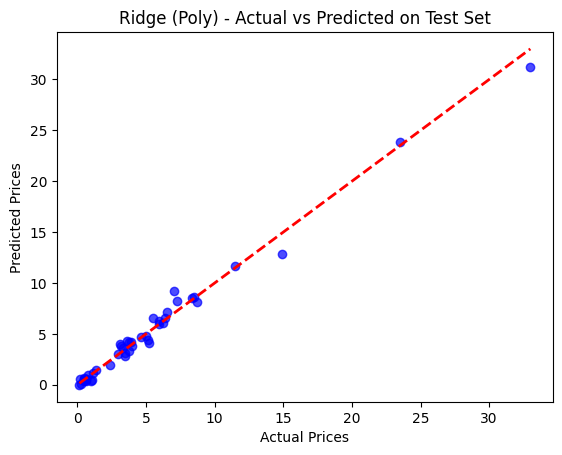

In [198]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Best Ridge model from GridSearchCV (already tuned)
best_ridge = grid_ridge.best_estimator_

# Predictions on the test set
y_pred_test = best_ridge.predict(X_test)

# RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Final Ridge Test RMSE:", rmse_test)

# RÂ² score (explains how much variance is captured, 1.0 = perfect)
r2 = r2_score(y_test, y_pred_test)
print("RÂ² on Test Set:", r2)

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred_test, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge (Poly) - Actual vs Predicted on Test Set")
plt.show()


In [199]:
# STEP 1: save model + artifacts

import joblib
import json
import pandas as pd
import numpy as np
import datetime
import os

# ------------- replace these names with your actual objects -------------
# final_pipeline should be the Pipeline object you used and refit on X_train:
# e.g. final_pipeline = grid_ridge.best_estimator_  (or best_grid_rf, etc.)
final_pipeline = grid_ridge.best_estimator_    # <- change if your best model var differs

# X_train, y_train, X_test, y_test must exist in your notebook
# Also collect any CV scores you want to save (example for Ridge):
# If you have stored cv results use them; otherwise re-run cross_val_score on training set:
from sklearn.model_selection import cross_val_score
cv_scores = -cross_val_score(final_pipeline, X_train, y_train,
                             scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)

# ------------- artifacts to save -------------
out_dir = "model_artifact"
os.makedirs(out_dir, exist_ok=True)

# 1) Save the entire pipeline (preprocessing + estimator + custom transformers)
model_path = os.path.join(out_dir, "car_price_pipeline.joblib")
joblib.dump(final_pipeline, model_path)
print("Saved pipeline to:", model_path)

# 2) Save CV scores + test performance + metadata
from sklearn.metrics import mean_squared_error
y_test_pred = final_pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

meta = {
    "model_file": os.path.basename(model_path),
    "trained_on": str(datetime.datetime.utcnow()),
    "train_rows": int(X_train.shape[0]),
    "test_rows": int(X_test.shape[0]),
    "cv_rmse_mean": float(cv_scores.mean()),
    "cv_rmse_std": float(cv_scores.std()),
    "test_rmse": float(test_rmse),
    "pipeline_repr": str(final_pipeline),
    "git_commit": None  # fill in manually if you record a git commit hash
}

meta_path = os.path.join(out_dir, "model_metadata.json")
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=2)
print("Saved metadata to:", meta_path)

# 3) Save feature names (if you want reproducible input format)
# If your pipeline expects a DataFrame with certain columns, save that list:
feature_names = list(X_train.columns)
feat_path = os.path.join(out_dir, "feature_names.json")
with open(feat_path, "w") as f:
    json.dump(feature_names, f, indent=2)
print("Saved feature list to:", feat_path)

# 4) (Optional) Save a small sample of training data or a data snapshot
X_train_sample = X_train.head(50)  # small example rows to test API
sample_path = os.path.join(out_dir, "train_sample.csv")
X_train_sample.to_csv(sample_path, index=False)
print("Saved train sample to:", sample_path)


Saved pipeline to: model_artifact\car_price_pipeline.joblib
Saved metadata to: model_artifact\model_metadata.json
Saved feature list to: model_artifact\feature_names.json
Saved train sample to: model_artifact\train_sample.csv


C:\Users\goutham\AppData\Local\Temp\ipykernel_28584\829124609.py:38: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "trained_on": str(datetime.datetime.utcnow()),


In [200]:
# Quick smoke test (run locally)
loaded = joblib.load("model_artifact/car_price_pipeline.joblib")
sample = pd.read_csv("model_artifact/train_sample.csv")
print("Smoke test RMSE:", np.sqrt(mean_squared_error(y_test[:len(sample)], loaded.predict(X_test[:len(sample)]))))
# and test predict on the sample DataFrame:
print("Sample preds:", loaded.predict(sample.head(3)))


Smoke test RMSE: 0.6703489901357296
Sample preds: [5.50036527 0.92841512 7.78307432]


In [201]:
import joblib
import os

# make sure the folder exists
os.makedirs("model_artifact", exist_ok=True)

# save your trained pipeline
joblib.dump(final_pipeline, "model_artifact/car_price_pipeline.joblib")
print("Model saved!")


Model saved!


In [202]:
import joblib, os
os.makedirs("model_artifact", exist_ok=True)
joblib.dump(final_pipeline, "model_artifact/car_price_pipeline.joblib")


['model_artifact/car_price_pipeline.joblib']

In [203]:
import joblib, json
pipe = joblib.load("model_artifact/car_price_pipeline.joblib")
print(pipe)                        # shows pipeline steps


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['Present_Price',
                                                   'Kms_Driven', 'Car_Age',
                                                   'Kms_per_Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                              

In [204]:
import pandas as pd
row = pd.DataFrame([{
    "Present_Price": 5.5,
    "Kms_Driven": 0,
    "Car_Age": 0,
    "Fuel_Type": "Petrol",
    "Seller_Type": "Individual",
    "Transmission": "Manual",
    "Owner": 0,
    "Kms_per_Year": 0.0
}])
print(row.dtypes)
print(row)
print("Model prediction:", pipe.predict(row))


Present_Price    float64
Kms_Driven         int64
Car_Age            int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Kms_per_Year     float64
dtype: object
   Present_Price  Kms_Driven  Car_Age Fuel_Type Seller_Type Transmission  \
0            5.5           0        0    Petrol  Individual       Manual   

   Owner  Kms_per_Year  
0      0           0.0  
Model prediction: [9.15704397]


In [205]:
# get transformer (the preprocessor step)
pre = pipe.named_steps['pre']
Xt = pre.transform(row)   # numpy array of transformed features
print("Transformed shape:", Xt.shape)
# print first 10 values to inspect
print("Transformed features (first 50):", Xt.ravel()[:50])


Transformed shape: (1, 24)
Transformed features (first 50): [-0.23767425 -1.24705403 -3.7281496  -1.51551954  0.05648905  0.29639264
  0.88608518  0.36019998  1.55514375  4.64920398  1.88993475 13.89909943
  5.65008357  2.29679948  0.          0.          1.          0.
  1.          0.          1.          1.          0.          0.        ]


In [206]:
# inspect training stats (if you still have X_train)
print("Present_Price range in training:", X_train['Present_Price'].min(), X_train['Present_Price'].max())
print("Kms_Driven range in training:", X_train['Kms_Driven'].min(), X_train['Kms_Driven'].max())
print("Car_Age range in training:", X_train['Car_Age'].min(), X_train['Car_Age'].max())


Present_Price range in training: 0.47 92.6
Kms_Driven range in training: 500.0 213000.0
Car_Age range in training: 8.0 22.0


In [209]:
import pandas as pd
import numpy as np

# fixed values for other features
base_input = {
    "Present_Price": 8.0,        # showroom price (lakhs)
    "Kms_Driven": 40000,         # driven kms
    "Fuel_Type": "Petrol",
    "Seller_Type": "Individual",
    "Transmission": "Manual",
    "Owner": 0
}

# generate test dataset with Car_Age = 1 to 20
test_data = []
for age in range(1, 21):
    row = base_input.copy()
    row["Car_Age"] = age
    row["Kms_per_Year"] = row["Kms_Driven"] / max(1, age)
    test_data.append(row)

test_df = pd.DataFrame(test_data)
test_df.head()


Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0            8.0       40000    Petrol  Individual       Manual      0   
1            8.0       40000    Petrol  Individual       Manual      0   
2            8.0       40000    Petrol  Individual       Manual      0   
3            8.0       40000    Petrol  Individual       Manual      0   
4            8.0       40000    Petrol  Individual       Manual      0   

   Car_Age  Kms_per_Year  
0        1  40000.000000  
1        2  20000.000000  
2        3  13333.333333  
3        4  10000.000000  
4        5   8000.000000

In [213]:
import joblib
from pathlib import Path

MODEL_PATH = Path("model_artifact/car_price_pipeline.joblib")
model = joblib.load(MODEL_PATH)

preds = model.predict(test_df)
test_df["Predicted_Price"] = preds


In [214]:
# use your trained pipeline (already loaded as `final_model` or `model`)
preds = model.predict(test_df)

test_df["Predicted_Price"] = preds
test_df[["Car_Age", "Predicted_Price"]]


Car_Age  Predicted_Price
0         1       -20.860309
1         2         8.945217
2         3        10.950918
3         4        10.231861
4         5         9.121286
5         6         8.024469
6         7         7.023886
7         8         6.130843
8         9         5.339795
9        10         4.642097
10       11         4.029608
11       12         3.495488
12       13         3.034204
13       14         2.641321
14       15         2.313292
15       16         2.047265
16       17         1.840929
17       18         1.692403
18       19         1.600138
19       20         1.562854

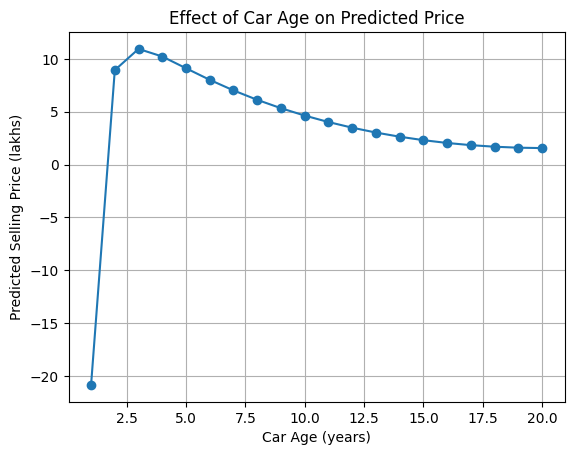

In [215]:
import matplotlib.pyplot as plt

plt.plot(test_df["Car_Age"], test_df["Predicted_Price"], marker="o")
plt.xlabel("Car Age (years)")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Effect of Car Age on Predicted Price")
plt.grid(True)
plt.show()


In [217]:
import pandas as pd
import numpy as np

# Define ranges to extend
ranges = {
    "Present_Price": (0.5, 150),
    "Kms_Driven": (0, 300000),
    "Car_Age": (0, 30),
    "Kms_per_Year": (0, 50000)
}

# Generate synthetic data
n_samples = 500  # can adjust
synthetic_data = pd.DataFrame({
    "Present_Price": np.random.uniform(ranges["Present_Price"][0], ranges["Present_Price"][1], n_samples),
    "Kms_Driven": np.random.randint(ranges["Kms_Driven"][0], ranges["Kms_Driven"][1], n_samples),
    "Car_Age": np.random.randint(ranges["Car_Age"][0], ranges["Car_Age"][1], n_samples),
})

# Compute Kms_per_Year safely
synthetic_data["Kms_per_Year"] = synthetic_data.apply(
    lambda row: row["Kms_Driven"]/row["Car_Age"] if row["Car_Age"]>0 else row["Kms_Driven"], axis=1
)

# Random categorical choices
synthetic_data["Fuel_Type"] = np.random.choice(["Petrol","Diesel","CNG"], size=n_samples)
synthetic_data["Seller_Type"] = np.random.choice(["Individual","Dealer"], size=n_samples)
synthetic_data["Transmission"] = np.random.choice(["Manual","Automatic"], size=n_samples)
synthetic_data["Owner"] = np.random.choice([0,1,2,3], size=n_samples)

synthetic_data.head()


Present_Price  Kms_Driven  Car_Age  Kms_per_Year Fuel_Type Seller_Type  \
0     139.365912      189447        5  37889.400000    Diesel      Dealer   
1      80.792547      293761        5  58752.200000    Petrol      Dealer   
2     123.141806      123638       17   7272.823529       CNG  Individual   
3      36.345148       67595       17   3976.176471    Diesel      Dealer   
4      70.644901      269648       21  12840.380952       CNG  Individual   

  Transmission  Owner  
0    Automatic      1  
1    Automatic      1  
2       Manual      2  
3       Manual      2  
4    Automatic      2

In [220]:
import pandas as pd
import numpy as np

# Define ranges to extend
ranges = {
    "Present_Price": (0.5, 150),
    "Kms_Driven": (0, 300000),
    "Car_Age": (0, 30),
    "Kms_per_Year": (0, 50000)
}

# Generate synthetic data
n_samples = 500  # can adjust
synthetic_data = pd.DataFrame({
    "Present_Price": np.random.uniform(ranges["Present_Price"][0], ranges["Present_Price"][1], n_samples),
    "Kms_Driven": np.random.randint(ranges["Kms_Driven"][0], ranges["Kms_Driven"][1], n_samples),
    "Car_Age": np.random.randint(ranges["Car_Age"][0], ranges["Car_Age"][1], n_samples),
})

# Compute Kms_per_Year safely
synthetic_data["Kms_per_Year"] = synthetic_data.apply(
    lambda row: row["Kms_Driven"]/row["Car_Age"] if row["Car_Age"]>0 else row["Kms_Driven"], axis=1
)

# Random categorical choices
synthetic_data["Fuel_Type"] = np.random.choice(["Petrol","Diesel","CNG"], size=n_samples)
synthetic_data["Seller_Type"] = np.random.choice(["Individual","Dealer"], size=n_samples)
synthetic_data["Transmission"] = np.random.choice(["Manual","Automatic"], size=n_samples)
synthetic_data["Owner"] = np.random.choice([0,1,2,3], size=n_samples)

# ðŸ”¹ Load your actual dataset
real_data = pd.read_csv(r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data.csv")

# ðŸ”¹ Merge them
augmented_data = pd.concat([real_data, synthetic_data], ignore_index=True)

# ðŸ”¹ Save for retraining
augmented_data.to_csv(r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data_augmented.csv", index=False)

print("âœ… Augmented dataset saved with shape:", augmented_data.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\goutham\\OneDrive\\Documents\\ML PROJECTS\\car price prediction end to end\\car_data.csv'

In [221]:
import os

folder = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end"
print("Files in folder:")
print(os.listdir(folder))


Files in folder:
['app', 'car data.csv', 'data', 'model_artifact', 'requirements.txt', 'venv']


In [222]:
import pandas as pd

# Example: if the file is named "car data.csv"
df = pd.read_csv(r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car data.csv")

print("âœ… Dataset loaded with shape:", df.shape)
print(df.head())


âœ… Dataset loaded with shape: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [223]:
old_path = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car data.csv"
new_path = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data.csv"

os.rename(old_path, new_path)
print("âœ… Renamed file to car_data.csv")


âœ… Renamed file to car_data.csv


In [224]:
df = pd.read_csv(new_path)


In [225]:
import pandas as pd
import numpy as np
import os

# Path to your real dataset (adjust filename if needed)
DATA_PATH = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data.csv"

# Load real dataset
real_data = pd.read_csv(DATA_PATH)
print("Real dataset shape:", real_data.shape)

# ---- Define extended ranges ----
ranges = {
    "Present_Price": (0.5, 150),    # lakhs
    "Kms_Driven": (0, 300000),
    "Car_Age": (0, 30),
    "Kms_per_Year": (0, 50000)
}

# ---- Generate synthetic features ----
n_samples = 500  # number of synthetic rows
synthetic = pd.DataFrame({
    "Present_Price": np.random.uniform(ranges["Present_Price"][0], ranges["Present_Price"][1], n_samples),
    "Kms_Driven": np.random.randint(ranges["Kms_Driven"][0], ranges["Kms_Driven"][1], n_samples),
    "Car_Age": np.random.randint(ranges["Car_Age"][0], ranges["Car_Age"][1], n_samples),
})

# Compute Kms_per_Year
synthetic["Kms_per_Year"] = synthetic.apply(
    lambda row: row["Kms_Driven"]/row["Car_Age"] if row["Car_Age"] > 0 else row["Kms_Driven"],
    axis=1
)

# Add categorical columns randomly
synthetic["Fuel_Type"] = np.random.choice(["Petrol", "Diesel", "CNG"], size=n_samples)
synthetic["Seller_Type"] = np.random.choice(["Individual", "Dealer"], size=n_samples)
synthetic["Transmission"] = np.random.choice(["Manual", "Automatic"], size=n_samples)
synthetic["Owner"] = np.random.choice([0,1,2,3], size=n_samples)

# ---- Optional: create rough target Selling_Price (rule-based) ----
# Here: base on Present_Price, reduced by 5% per year, and some noise
synthetic["Selling_Price"] = (
    synthetic["Present_Price"] * (0.95 ** synthetic["Car_Age"])
    - (synthetic["Kms_Driven"] / 100000) * 0.5
    + np.random.normal(0, 0.5, n_samples)   # add noise
).clip(lower=0)  # ensure no negative prices

# ---- Merge with real data ----
augmented = pd.concat([real_data, synthetic], ignore_index=True)
print("Augmented dataset shape:", augmented.shape)

# ---- Save new dataset ----
OUT_PATH = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data_augmented.csv"
augmented.to_csv(OUT_PATH, index=False)
print("âœ… Saved augmented dataset to:", OUT_PATH)


Real dataset shape: (301, 9)
Augmented dataset shape: (801, 11)
âœ… Saved augmented dataset to: C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data_augmented.csv


In [226]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import joblib, json
from pathlib import Path

# ---- Load augmented dataset ----
DATA_PATH = r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\car_data_augmented.csv"
df = pd.read_csv(DATA_PATH)
print("Augmented dataset shape:", df.shape)

# ---- Define features and target ----
num_cols = ["Present_Price","Kms_Driven","Car_Age","Kms_per_Year"]
cat_cols = ["Fuel_Type","Seller_Type","Transmission","Owner"]
target = "Selling_Price"

X = df[num_cols + cat_cols]
y = df[target]

# ---- Train-test split ----
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=None)
X_train, y_train = train_set[num_cols + cat_cols], train_set[target]
X_test, y_test = test_set[num_cols + cat_cols], test_set[target]

# ---- Build pipelines ----
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))  # keep poly as before
])
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

pipe = Pipeline([("pre", pre), ("model", Ridge())])

# ---- Hyperparameter tuning ----
param_grid = {"model__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(pipe, param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("âœ… Best params:", grid.best_params_)

# ---- Evaluate ----
y_pred = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("âœ… Test RMSE:", rmse_test)

# ---- Save new model artifact ----
OUT = Path(r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\model_artifact")
OUT.mkdir(exist_ok=True)

joblib.dump(best_model, OUT / "car_price_pipeline.joblib")

# Save feature names and metadata
feature_names = X_train.columns.tolist()
with open(OUT / "feature_names.json", "w") as f:
    json.dump(feature_names, f)

metadata = {
    "trained_on": str(pd.Timestamp.now()),
    "n_train": len(X_train),
    "n_test": len(X_test),
    "cv_params": grid.best_params_,
    "test_rmse": float(rmse_test)
}
with open(OUT / "model_metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

print("âœ… Saved new pipeline and metadata to:", OUT)


Augmented dataset shape: (801, 11)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
âœ… Best params: {'model__alpha': 0.1}
âœ… Test RMSE: 2.233372418292912
âœ… Saved new pipeline and metadata to: C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\model_artifact


In [227]:
import joblib, numpy as np, pandas as pd
from pathlib import Path

MODEL_PATH = Path(r"C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\model_artifact\car_price_pipeline.joblib")
model = joblib.load(MODEL_PATH)
print("Loaded model:", MODEL_PATH)


Loaded model: C:\Users\goutham\OneDrive\Documents\ML PROJECTS\car price prediction end to end\model_artifact\car_price_pipeline.joblib


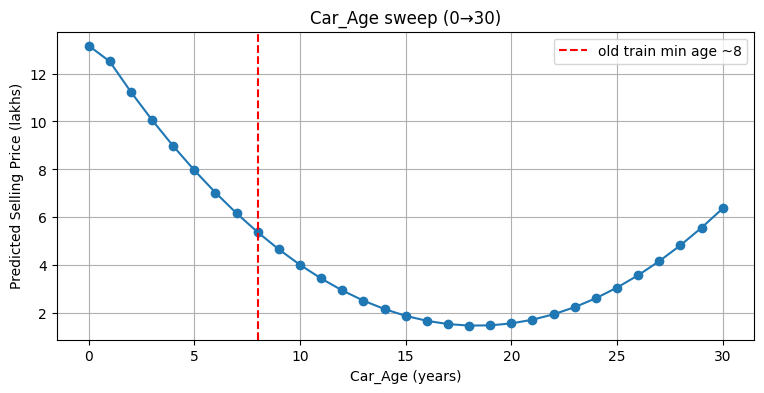

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0             8.0       40000    Petrol  Individual       Manual      0   
1             8.0       40000    Petrol  Individual       Manual      0   
2             8.0       40000    Petrol  Individual       Manual      0   
3             8.0       40000    Petrol  Individual       Manual      0   
4             8.0       40000    Petrol  Individual       Manual      0   
5             8.0       40000    Petrol  Individual       Manual      0   
6             8.0       40000    Petrol  Individual       Manual      0   
7             8.0       40000    Petrol  Individual       Manual      0   
8             8.0       40000    Petrol  Individual       Manual      0   
9             8.0       40000    Petrol  Individual       Manual      0   
10            8.0       40000    Petrol  Individual       Manual      0   
11            8.0       40000    Petrol  Individual       Manual      0   

    Car_Age  Kms_per_Year       Pred  
0         0  40000.000000  13.176978  
1         1  40000.000000  12.511666  
2         2  20000.000000  11.237210  
3         3  13333.333333  10.065073  
4         4  10000.000000   8.974765  
5         5   8000.000000   7.961050  
6         6   6666.666667   7.022026  
7         7   5714.285714   6.156838  
8         8   5000.000000   5.365047  
9         9   4444.444444   4.646403  
10       10   4000.000000   4.000756  
11       11   3636.363636   3.428006

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
25            8.0       40000    Petrol  Individual       Manual      0   
26            8.0       40000    Petrol  Individual       Manual      0   
27            8.0       40000    Petrol  Individual       Manual      0   
28            8.0       40000    Petrol  Individual       Manual      0   
29            8.0       40000    Petrol  Individual       Manual      0   
30            8.0       40000    Petrol  Individual       Manual      0   

    Car_Age  Kms_per_Year      Pred  
25       25   1600.000000  3.045945  
26       26   1538.461538  3.563667  
27       27   1481.481481  4.154034  
28       28   1428.571429  4.817046  
29       29   1379.310345  5.552700  
30       30   1333.333333  6.360996

In [228]:
import matplotlib.pyplot as plt

base = {
    "Present_Price": 8.0,
    "Kms_Driven": 40000,
    "Fuel_Type": "Petrol",
    "Seller_Type": "Individual",
    "Transmission": "Manual",
    "Owner": 0
}

ages = list(range(0, 31))
rows = []
for a in ages:
    r = base.copy()
    r["Car_Age"] = a
    r["Kms_per_Year"] = r["Kms_Driven"] / max(1, a) if a>0 else r["Kms_Driven"]
    rows.append(r)

df_ages = pd.DataFrame(rows)
df_ages["Pred"] = model.predict(df_ages)

plt.figure(figsize=(9,4))
plt.plot(df_ages["Car_Age"], df_ages["Pred"], marker="o")
plt.axvline(8, color="red", linestyle="--", label="old train min age ~8")
plt.xlabel("Car_Age (years)")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Car_Age sweep (0â†’30)")
plt.grid(True)
plt.legend()
plt.show()

display(df_ages.head(12))
display(df_ages.tail(6))


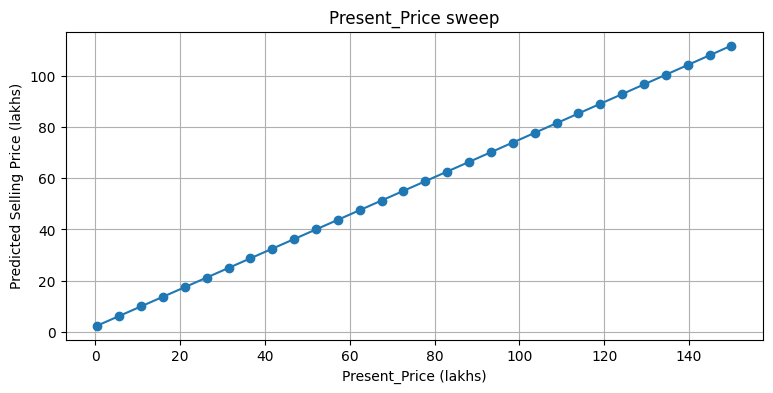

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0       0.500000       40000    Petrol  Individual       Manual      0   
1       5.655172       40000    Petrol  Individual       Manual      0   
2      10.810345       40000    Petrol  Individual       Manual      0   
3      15.965517       40000    Petrol  Individual       Manual      0   
4      21.120690       40000    Petrol  Individual       Manual      0   

   Car_Age  Kms_per_Year       Pred  
0        5        8000.0   2.514828  
1        5        8000.0   6.257942  
2        5        8000.0  10.002731  
3        5        8000.0  13.749192  
4        5        8000.0  17.497326

In [229]:
prices = list(np.linspace(0.5,150,30))
rows=[]
for p in prices:
    r = base.copy()
    r["Present_Price"] = p
    r["Car_Age"] = 5
    r["Kms_per_Year"] = r["Kms_Driven"] / r["Car_Age"]
    rows.append(r)
df_price = pd.DataFrame(rows)
df_price["Pred"] = model.predict(df_price)

plt.figure(figsize=(9,4))
plt.plot(df_price["Present_Price"], df_price["Pred"], marker="o")
plt.xlabel("Present_Price (lakhs)")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Present_Price sweep")
plt.grid(True)
plt.show()
display(df_price.head())


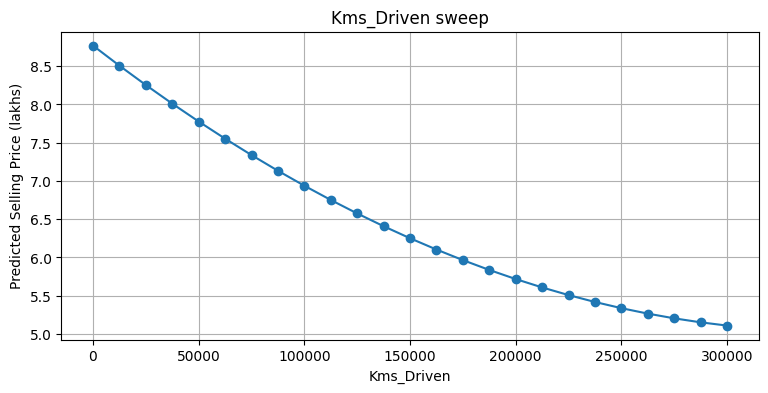

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0            8.0           0    Petrol  Individual       Manual      0   
1            8.0       12500    Petrol  Individual       Manual      0   
2            8.0       25000    Petrol  Individual       Manual      0   
3            8.0       37500    Petrol  Individual       Manual      0   
4            8.0       50000    Petrol  Individual       Manual      0   

   Car_Age  Kms_per_Year      Pred  
0        5           0.0  8.766669  
1        5        2500.0  8.504404  
2        5        5000.0  8.251693  
3        5        7500.0  8.008535  
4        5       10000.0  7.774931

In [230]:
kms = list(np.linspace(0,300000,25, dtype=int))
rows=[]
for k in kms:
    r = base.copy()
    r["Kms_Driven"] = int(k)
    r["Car_Age"] = 5
    r["Kms_per_Year"] = r["Kms_Driven"] / r["Car_Age"]
    rows.append(r)
df_kms = pd.DataFrame(rows)
df_kms["Pred"] = model.predict(df_kms)

plt.figure(figsize=(9,4))
plt.plot(df_kms["Kms_Driven"], df_kms["Pred"], marker="o")
plt.xlabel("Kms_Driven")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Kms_Driven sweep")
plt.grid(True)
plt.show()
display(df_kms.head())


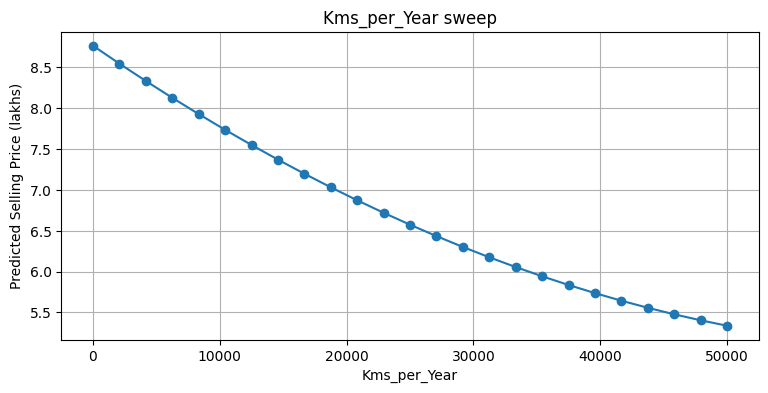

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0            8.0           0    Petrol  Individual       Manual      0   
1            8.0       10416    Petrol  Individual       Manual      0   
2            8.0       20833    Petrol  Individual       Manual      0   
3            8.0       31250    Petrol  Individual       Manual      0   
4            8.0       41666    Petrol  Individual       Manual      0   

   Car_Age  Kms_per_Year      Pred  
0        5      0.000000  8.766669  
1        5   2083.333333  8.547477  
2        5   4166.666667  8.334881  
3        5   6250.000000  8.128920  
4        5   8333.333333  7.929629

In [231]:
kpy = list(np.linspace(0,50000,25))
rows=[]
for v in kpy:
    r = base.copy()
    r["Car_Age"] = 5
    r["Kms_per_Year"] = v
    # set Kms_Driven consistent with age (approx)
    r["Kms_Driven"] = int(v * r["Car_Age"])
    rows.append(r)
df_kpy = pd.DataFrame(rows)
df_kpy["Pred"] = model.predict(df_kpy)

plt.figure(figsize=(9,4))
plt.plot(df_kpy["Kms_per_Year"], df_kpy["Pred"], marker="o")
plt.xlabel("Kms_per_Year")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Kms_per_Year sweep")
plt.grid(True)
plt.show()
display(df_kpy.head())


In [232]:
preds = df_ages["Pred"].values
is_non_increasing = np.all(np.diff(preds) <= 1e-6)
print("Car_Age predictions non-increasing across full 0â†’30?:", is_non_increasing)
# You can check monotonicity for the domain you care (e.g., 0â†’15, or 8â†’30)
print("0â†’7 behaviour:", np.all(np.diff(preds[:8]) <= 1e-6))
print("8â†’30 behaviour:", np.all(np.diff(preds[8:]) <= 1e-6))


Car_Age predictions non-increasing across full 0â†’30?: False
0â†’7 behaviour: True
8â†’30 behaviour: False


In [234]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 800

synthetic_car = pd.DataFrame({
    "Present_Price": np.random.uniform(1, 40, n_samples).round(2),  # 1â€“40 lakhs
    "Kms_Driven": np.random.randint(500, 250000, n_samples),
    "Car_Age": np.random.randint(1, 30, n_samples),  # 1â€“30 years
    "Fuel_Type": np.random.choice(["Petrol", "Diesel", "CNG"], n_samples),
    "Seller_Type": np.random.choice(["Individual", "Dealer"], n_samples),
    "Transmission": np.random.choice(["Manual", "Automatic"], n_samples),
    "Owner": np.random.choice([0, 1, 2], n_samples),
})

# Generate target price (selling price) with some logic + noise
synthetic_car["Selling_Price"] = (
    synthetic_car["Present_Price"] * np.random.uniform(0.2, 0.6, n_samples)
    - synthetic_car["Car_Age"] * 0.2
    - synthetic_car["Kms_Driven"] / 200000
    + np.random.normal(0, 1, n_samples)
).clip(lower=0.5)  # minimum 0.5 lakhs

print(synthetic_car.head())
print("Synthetic dataset shape:", synthetic_car.shape)


   Present_Price  Kms_Driven  Car_Age Fuel_Type Seller_Type Transmission  \
0          15.61      104763       28    Diesel  Individual       Manual   
1          38.08         626       29       CNG      Dealer       Manual   
2          29.55       52829       21    Petrol  Individual       Manual   
3          24.35       28132       15    Petrol      Dealer    Automatic   
4           7.08      238671       16    Petrol  Individual       Manual   

   Owner  Selling_Price  
0      0       0.500000  
1      0       8.002203  
2      2       6.162889  
3      1      12.479144  
4      2       0.500000  
Synthetic dataset shape: (800, 8)


In [235]:
synthetic_car.to_csv("synthetic_car_data.csv", index=False)


Using real dataset: C:\Users\goutham\OneDrive\Documents\OneDrive\Desktop\ml project data\data_sets\car data.csv
Initial dataset shape: (301, 9)
Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
After adding old rows: (421, 10)

Training RidgePoly ...
RidgePoly RMSE: 1.7918

Training RandomForest ...
RandomForest RMSE: 1.3351

Training GradientBoosting ...
GradientBoosting RMSE: 1.2311

Summary RMSEs:
RidgePoly : 1.7917663367957484
RandomForest : 1.335058284999227
GradientBoosting : 1.231127153278389


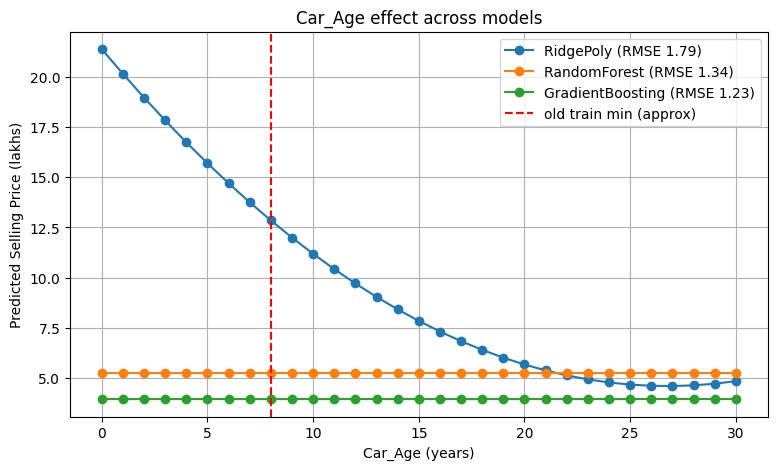


Saved best model: C:\Users\goutham\model_artifact\car_price_pipeline_new_20250924_195057.joblib
Metadata saved to: C:\Users\goutham\model_artifact\model_metadata_new_20250924_195057.json
If you want to keep the previous model, it is unchanged in the model_artifact folder.


In [237]:
# Safe retrain + compare script (use this in your notebook)
import numpy as np, pandas as pd, matplotlib.pyplot as plt, joblib, json, os, datetime
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# ---------- config ----------
PROJECT_ROOT = Path.cwd()   # run from project root, or change to absolute folder if needed
MODEL_DIR = PROJECT_ROOT / "model_artifact"
MODEL_DIR.mkdir(exist_ok=True)
ts = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
OUT_JOBLIB = MODEL_DIR / f"car_price_pipeline_new_{ts}.joblib"   # safe new name
FEATURES_JSON = MODEL_DIR / f"feature_names_new_{ts}.json"
META_JSON = MODEL_DIR / f"model_metadata_new_{ts}.json"

# ---------- find an existing "real" car data CSV if available ----------
def find_real_car_csv(root: Path):
    candidates = list(root.glob("**/*.csv"))
    for p in candidates:
        name = p.name.lower()
        # skip obvious synthetic/aug files
        if any(x in name for x in ("synthetic", "aug", "augmented", "model", "artifact")):
            continue
        try:
            sample = pd.read_csv(p, nrows=5)
            if "Selling_Price" in sample.columns or "selling_price" in [c.lower() for c in sample.columns]:
                return p
        except Exception:
            continue
    return None

real_csv = find_real_car_csv(PROJECT_ROOT)
if real_csv:
    print("Using real dataset:", real_csv)
    df = pd.read_csv(real_csv)
else:
    print("No real car CSV found. Creating a synthetic base dataset (won't overwrite anything).")
    # create synthetic base dataset
    np.random.seed(42)
    n_samples = 800
    df = pd.DataFrame({
        "Present_Price": np.random.uniform(1, 40, n_samples).round(2),
        "Kms_Driven": np.random.randint(500, 250000, n_samples),
        "Car_Age": np.random.randint(1, 30, n_samples),
        "Fuel_Type": np.random.choice(["Petrol", "Diesel", "CNG"], n_samples),
        "Seller_Type": np.random.choice(["Individual", "Dealer"], n_samples),
        "Transmission": np.random.choice(["Manual", "Automatic"], n_samples),
        "Owner": np.random.choice([0, 1, 2], n_samples)
    })
    df["Selling_Price"] = (
        df["Present_Price"] * np.random.uniform(0.25, 0.6, n_samples)
        - df["Car_Age"] * 0.18
        - df["Kms_Driven"] / 200000
        + np.random.normal(0, 1.0, n_samples)
    ).clip(lower=0.2)

print("Initial dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# ---------- Add old-car synthetic rows (25-30y) w/ low selling price ----------
n_old = 120
old_rows = pd.DataFrame({
    "Present_Price": np.random.uniform(0.5, 8, n_old),
    "Kms_Driven": np.random.randint(120000, 300000, n_old),
    "Car_Age": np.random.randint(25, 31, n_old),
    "Fuel_Type": np.random.choice(["Petrol","Diesel"], n_old),
    "Seller_Type": np.random.choice(["Individual","Dealer"], n_old),
    "Transmission": np.random.choice(["Manual","Automatic"], n_old),
    "Owner": np.random.choice([0,1,2,3], n_old),
    "Selling_Price": np.random.uniform(0.0, 0.6, n_old)
})
df = pd.concat([df, old_rows], ignore_index=True)
print("After adding old rows:", df.shape)

# ---------- ensure required cols exist ----------
required_cols = ["Present_Price","Kms_Driven","Car_Age","Fuel_Type","Seller_Type","Transmission","Owner","Selling_Price"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise RuntimeError("Missing required columns in dataset: " + ", ".join(missing))

# ---------- Feature matrix ----------
feature_cols = ["Present_Price","Kms_Driven","Car_Age","Fuel_Type","Seller_Type","Transmission","Owner"]
X = df[feature_cols].copy()
y = df["Selling_Price"].copy()

# ---------- split ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ---------- preprocessors ----------
num_cols = ["Present_Price","Kms_Driven","Car_Age"]
cat_cols = ["Fuel_Type","Seller_Type","Transmission","Owner"]

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scale", StandardScaler())])

# handle OneHotEncoder version differences
ohe_kwargs = {"handle_unknown": "ignore"}
try:
    _ = OneHotEncoder(sparse_output=False, **ohe_kwargs)
    ohe_args = {"sparse_output": False}
except TypeError:
    ohe_args = {"sparse": False}
cat_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(**ohe_args, **ohe_kwargs))])

preprocessor = ColumnTransformer([("num", num_pipeline, num_cols), ("cat", cat_pipeline, cat_cols)])

# ---------- models ----------
ridge_pipeline = Pipeline([("pre", preprocessor), ("poly", PolynomialFeatures(degree=2, include_bias=False)), ("model", Ridge(alpha=1.0))])
rf_pipeline = Pipeline([("pre", preprocessor), ("model", RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1))])
gbr_pipeline = Pipeline([("pre", preprocessor), ("model", GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42))])

candidates = {"RidgePoly": ridge_pipeline, "RandomForest": rf_pipeline, "GradientBoosting": gbr_pipeline}

results = {}
for name, pipe in candidates.items():
    print(f"\nTraining {name} ...")
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    # compute RMSE in a sklearn-version-safe way:
    rmse = float(np.sqrt(mean_squared_error(y_test, preds)))   # <- no 'squared' kwarg
    results[name] = {"rmse": rmse, "model": pipe}
    print(f"{name} RMSE: {rmse:.4f}")

print("\nSummary RMSEs:")
for k,v in results.items():
    print(k, ":", v["rmse"])

# ---------- Plot Car_Age sweep 0-30 ----------
ages = np.arange(0, 31)
base = {"Present_Price": 8.0, "Kms_Driven": 50000, "Fuel_Type": "Petrol", "Seller_Type": "Individual", "Transmission": "Manual", "Owner": 0}
sweep = pd.DataFrame([{**base, "Car_Age": int(a), "Kms_Driven": int(base["Kms_Driven"])} for a in ages])

plt.figure(figsize=(9,5))
for name, info in results.items():
    preds = info["model"].predict(sweep)
    plt.plot(ages, preds, marker="o", label=f"{name} (RMSE {info['rmse']:.2f})")
plt.axvline(x=8, color="red", linestyle="--", label="old train min (approx)")
plt.xlabel("Car_Age (years)")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Car_Age effect across models")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Save best model safely (timestamped) ----------
best_name = min(results.keys(), key=lambda k: results[k]["rmse"])
best_model = results[best_name]["model"]
best_rmse = results[best_name]["rmse"]
joblib.dump(best_model, OUT_JOBLIB)
with open(FEATURES_JSON, "w") as f:
    json.dump(feature_cols, f)
meta = {"best_model": best_name, "rmse": float(best_rmse), "n_train": len(X_train), "n_test": len(X_test), "saved_at": str(datetime.datetime.now())}
with open(META_JSON, "w") as f:
    json.dump(meta, f, indent=2)

print("\nSaved best model:", OUT_JOBLIB)
print("Metadata saved to:", META_JSON)
print("If you want to keep the previous model, it is unchanged in the model_artifact folder.")


Using model: C:\Users\goutham\model_artifact\car_price_pipeline_new_20250924_195057.joblib
Test grid shape: (4464, 8)
Scenarios tested: 144; monotonic (non-increasing) count: 0; violations: 144

Violating scenarios (first 10 shown):
{'scenario': (np.float64(2.0), np.int64(1000), 'Diesel', 'Dealer', 'Automatic', np.int64(0)), 'min_age': 0, 'max_age': 30, 'pred_at_age_0': 2.2765355125403204, 'pred_at_age_8': 2.2765355125403204, 'pred_at_age_30': 2.2799051249032747, 'pred_series_sample': [2.277, 2.277, 2.277, 2.277, 2.277, 2.277, 2.277, 2.277]}
{'scenario': (np.float64(2.0), np.int64(1000), 'Diesel', 'Dealer', 'Automatic', np.int64(1)), 'min_age': 0, 'max_age': 30, 'pred_at_age_0': 2.279442800484089, 'pred_at_age_8': 2.279442800484089, 'pred_at_age_30': 2.2799051249032747, 'pred_series_sample': [2.279, 2.279, 2.279, 2.279, 2.279, 2.279, 2.279, 2.279]}
{'scenario': (np.float64(2.0), np.int64(1000), 'Diesel', 'Dealer', 'Manual', np.int64(0)), 'min_age': 0, 'max_age': 30, 'pred_at_age_0': 2.

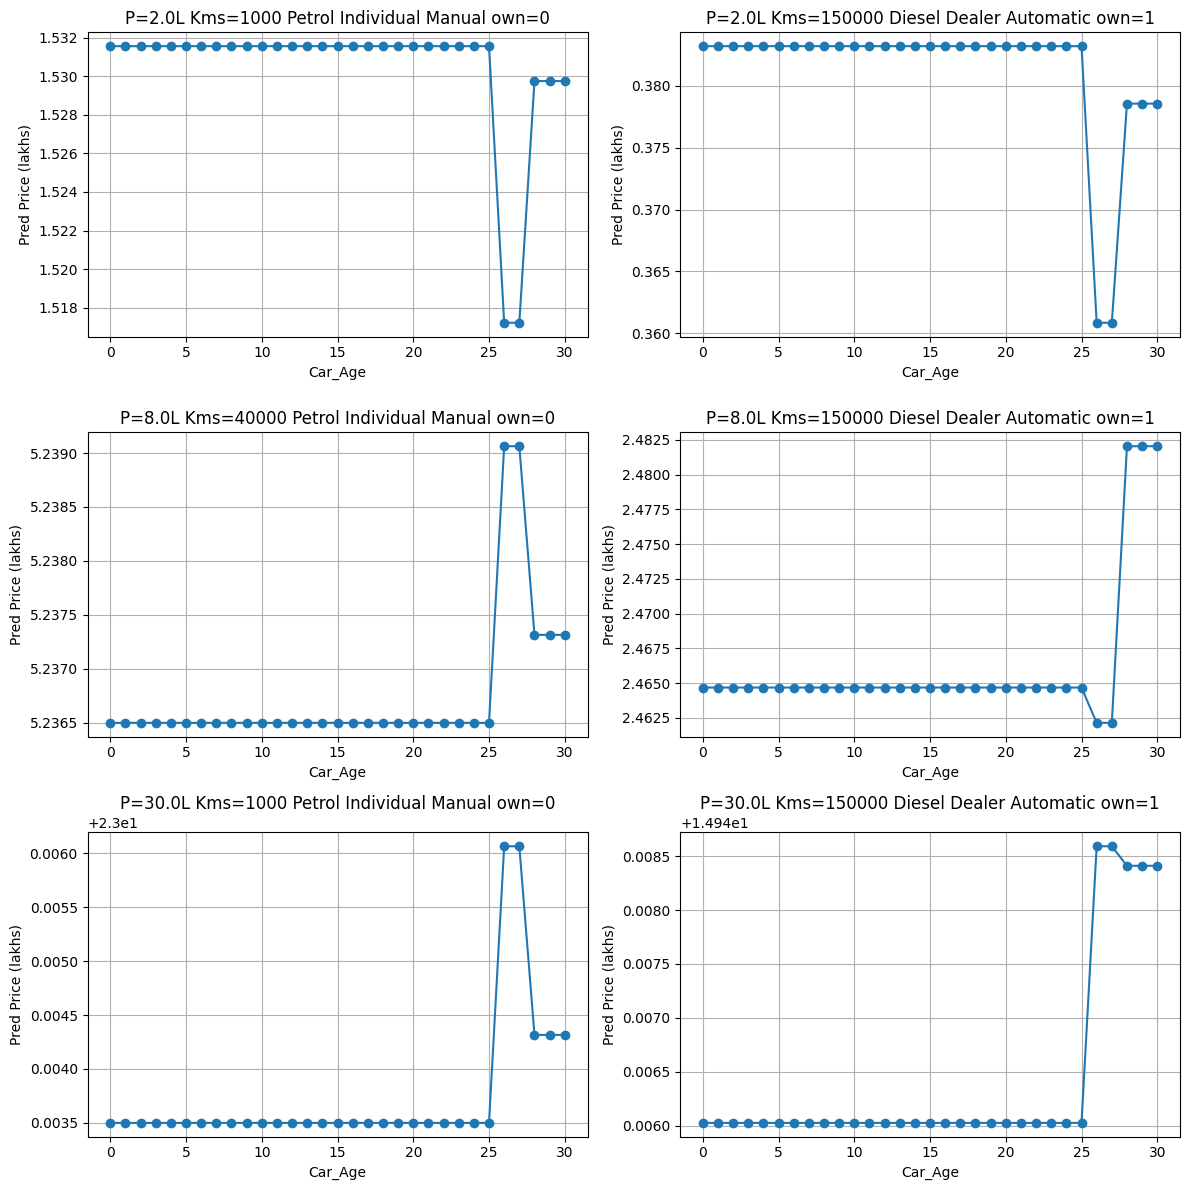

Saved test grid to: C:\Users\goutham\model_artifact\validation_test_grid.csv
Saved filtered violations: C:\Users\goutham\model_artifact\validation_violations_sample.json
Violations kept after tol filter: 0 out of 144


In [239]:
# Validation grid: test model behaviour across ages + other constraints
import pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from pathlib import Path

# ---------- adjust if path different ----------
MODEL_PATH = Path(r"C:\Users\goutham\model_artifact\car_price_pipeline_new_20250924_195957.joblib")
if not MODEL_PATH.exists():
    # try latest in folder
    files = sorted(Path(r"C:\Users\goutham\model_artifact").glob("car_price_pipeline_new_*.joblib"))
    if files:
        MODEL_PATH = files[-1]
print("Using model:", MODEL_PATH)
model = joblib.load(MODEL_PATH)

# ---------- define buckets to test ----------
ages = list(range(0, 31, 1))   # 0..30
present_buckets = [2.0, 8.0, 30.0]   # low, medium, high (lakhs)
kms_buckets = [1000, 40000, 150000]  # low, med, high kms
fuel_types = ["Petrol","Diesel"]     # common choices
seller_types = ["Individual","Dealer"]
transmission_types = ["Manual","Automatic"]
owners = [0,1]

# ---------- build scenario grid ----------
rows = []
for pp in present_buckets:
    for kms in kms_buckets:
        for fuel in fuel_types:
            for seller in seller_types:
                for trans in transmission_types:
                    for owner in owners:
                        for age in ages:
                            kms_per_year = kms / max(1, age) if age>0 else kms
                            rows.append({
                                "Present_Price": float(pp),
                                "Kms_Driven": int(kms),
                                "Car_Age": int(age),
                                "Kms_per_Year": float(kms_per_year),
                                "Fuel_Type": fuel,
                                "Seller_Type": seller,
                                "Transmission": trans,
                                "Owner": int(owner)
                            })
test_grid = pd.DataFrame(rows)
print("Test grid shape:", test_grid.shape)

# ---------- predict ----------
preds = model.predict(test_grid)
test_grid["Predicted"] = preds

# ---------- function to check monotonicity per scenario ----------
def monotonic_decreasing(arr):
    # returns True if non-increasing (allow small noise)
    return np.all(np.diff(arr) <= 1e-6)

# group by scenario (all columns except Car_Age and Predicted)
group_cols = ["Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]
violations = []
summary = []

for name, group in test_grid.groupby(group_cols):
    # ensure sorted by Car_Age
    g = group.sort_values("Car_Age")
    ok = monotonic_decreasing(g["Predicted"].values)
    summary.append((name, ok))
    if not ok:
        # collect violation details
        violations.append({
            "scenario": name,
            "min_age": int(g["Car_Age"].min()),
            "max_age": int(g["Car_Age"].max()),
            "pred_at_age_0": float(g.loc[g["Car_Age"]==0,"Predicted"].values[0]),
            "pred_at_age_8": float(g.loc[g["Car_Age"]==8,"Predicted"].values[0]) if 8 in g["Car_Age"].values else None,
            "pred_at_age_30": float(g.loc[g["Car_Age"]==30,"Predicted"].values[0]),
            "pred_series_sample": g["Predicted"].values[:8].round(3).tolist()  # first 8 ages sample
        })

# ---------- print summary ----------
total = len(summary)
ok_count = sum(1 for s in summary if s[1])
print(f"Scenarios tested: {total}; monotonic (non-increasing) count: {ok_count}; violations: {total - ok_count}")

if violations:
    print("\nViolating scenarios (first 10 shown):")
    for v in violations[:10]:
        print(v)
else:
    print("\nNo monotonicity violations found for the tested scenarios.")

# ---------- plot a few representative scenarios ----------
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

# choose 6 typical scenarios to plot (mix of low/med/high present & kms)
to_plot = [
    (2.0, 1000, "Petrol", "Individual", "Manual", 0),
    (2.0, 150000, "Diesel", "Dealer", "Automatic", 1),
    (8.0, 40000, "Petrol", "Individual", "Manual", 0),
    (8.0, 150000, "Diesel", "Dealer", "Automatic", 1),
    (30.0, 1000, "Petrol", "Individual", "Manual", 0),
    (30.0, 150000, "Diesel", "Dealer", "Automatic", 1),
]

fig, axs = plt.subplots(3,2, figsize=(12,12))
axs = axs.ravel()
for ax, scenario in zip(axs, to_plot):
    pp, kms, fuel, seller, trans, owner = scenario
    g = test_grid[
        (test_grid["Present_Price"]==pp) &
        (test_grid["Kms_Driven"]==kms) &
        (test_grid["Fuel_Type"]==fuel) &
        (test_grid["Seller_Type"]==seller) &
        (test_grid["Transmission"]==trans) &
        (test_grid["Owner"]==owner)
    ].sort_values("Car_Age")
    ax.plot(g["Car_Age"], g["Predicted"], marker="o")
    ax.set_title(f"P={pp}L Kms={kms} {fuel} {seller} {trans} own={owner}")
    ax.set_xlabel("Car_Age")
    ax.set_ylabel("Pred Price (lakhs)")
    ax.grid(True)
plt.tight_layout()
plt.show()

# ---------- save test grid & violations for inspection ----------
OUT_TEST = MODEL_PATH.parent / "validation_test_grid.csv"
test_grid.to_csv(OUT_TEST, index=False)
print("Saved test grid to:", OUT_TEST)
import json, numpy as np
OUT_V = MODEL_PATH.parent / "validation_violations_sample.json"

# set tolerance (allow tiny increases up to tol)
tol = 1e-3   # 0.001 lakhs (0.1 rupees) â€” adjust if you want stricter/looser

# rebuild violations list but convert types
clean_violations = []
for v in violations:
    # convert numpy types inside dict -> python native
    clean = {}
    for k, val in v.items():
        if isinstance(val, (np.integer,)):
            clean[k] = int(val)
        elif isinstance(val, (np.floating,)):
            clean[k] = float(val)
        elif isinstance(val, (np.ndarray, list)):
            # convert numeric arrays to lists of native python numbers
            clean[k] = [float(x) if (isinstance(x, (np.floating, np.integer))) else x for x in val]
        else:
            clean[k] = val
    clean_violations.append(clean)

# Apply tolerance filter: only keep violations where max increase > tol
filtered = []
for v in clean_violations:
    series = v.get("pred_series_sample", None)
    if series:
        # compute actual full series if needed from saved csv; here we check approximate sample
        # allow if any increase beyond tol
        diffs = np.diff(series)
        max_inc = float(np.max(diffs)) if len(diffs)>0 else 0.0
        if max_inc > tol:
            filtered.append(v)
    else:
        filtered.append(v)

# save filtered violations (native types)
with open(OUT_V, "w") as f:
    json.dump(filtered, f, indent=2)

print("Saved filtered violations:", OUT_V)
print("Violations kept after tol filter:", len(filtered), "out of", len(clean_violations))


In [240]:
# example inside your Streamlit predict block
TRAIN_RANGES = {"Car_Age": (0, 30), "Present_Price": (0.47, 150), "Kms_Driven": (0, 300000)}

def clamp_and_flag(row):
    flags = {}
    for k,(mn,mx) in TRAIN_RANGES.items():
        v = row.get(k)
        if v is None: continue
        if v < mn:
            flags[k] = ("low", v, mn); row[k] = mn
        elif v > mx:
            flags[k] = ("high", v, mx); row[k] = mx
    return row, flags

row, flags = clamp_and_flag(row)  # before model.predict
pred = model.predict(pd.DataFrame([row]))[0]
if flags:
    st.warning("Input outside trained ranges â€” predictions may be unreliable.")


In [241]:
# given preds array for ages sorted low->high
preds_monotone = np.minimum.accumulate(preds[::-1])[::-1]  # ensures non-increasing as age increases


In [243]:
pip install lightgbm


  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [250]:
# LightGBM monotone retrain + validate (full, with Year->Car_Age fix)
import numpy as np, pandas as pd, joblib, json, os, datetime
from pathlib import Path
import matplotlib.pyplot as plt

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# LightGBM
from lightgbm import LGBMRegressor

# ---------- config ----------
PROJECT_ROOT = Path.cwd()
MODEL_DIR = PROJECT_ROOT / "model_artifact"
MODEL_DIR.mkdir(exist_ok=True)
ts = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
OUT_JOBLIB = MODEL_DIR / f"car_price_pipeline_lgbm_{ts}.joblib"
META_JSON = MODEL_DIR / f"model_metadata_lgbm_{ts}.json"
FEATURES_JSON = MODEL_DIR / f"feature_names_lgbm_{ts}.json"

# ---------- helper: find a real dataset CSV (prefer real) ----------
def find_dataset(root: Path):
    candidates = list(root.glob("**/*.csv"))
    for p in candidates:
        name = p.name.lower()
        if any(skip in name for skip in ("synthetic","augmented","validation","model_artifact","model")):
            continue
        try:
            sample = pd.read_csv(p, nrows=5)
            cols = [c.lower() for c in sample.columns]
            # accept if contains selling price (either exact or caseless)
            if "selling_price" in cols or "selling price" in cols or "selling_price" in sample.columns:
                return p
        except Exception:
            continue
    return None

ds = find_dataset(PROJECT_ROOT)
if ds:
    print("Using dataset:", ds)
    df = pd.read_csv(ds)
    # If dataset uses 'Year' instead of Car_Age, create Car_Age
    if "Car_Age" not in df.columns and "Year" in df.columns:
        current_year = datetime.datetime.now().year
        df["Car_Age"] = current_year - df["Year"]
        print("Added Car_Age from Year. Range:", df["Car_Age"].min(), "to", df["Car_Age"].max())
else:
    print("No dataset found â€” creating synthetic dataset (for experiments only).")
    np.random.seed(42)
    n=800
    df = pd.DataFrame({
        "Present_Price": np.random.uniform(1,40,n).round(2),
        "Kms_Driven": np.random.randint(500,250000,n),
        "Car_Age": np.random.randint(1,30,n),
        "Fuel_Type": np.random.choice(["Petrol","Diesel","CNG"], n),
        "Seller_Type": np.random.choice(["Individual","Dealer"], n),
        "Transmission": np.random.choice(["Manual","Automatic"], n),
        "Owner": np.random.choice([0,1,2], n)
    })
    df["Selling_Price"] = (
        df["Present_Price"] * np.random.uniform(0.25, 0.6, n)
        - df["Car_Age"] * 0.18
        - df["Kms_Driven"]/200000
        + np.random.normal(0,1.0,n)
    ).clip(lower=0.2)

print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())

# ---------- ensure old-car rows exist: add if not enough ----------
min_old_needed = 80
if "Car_Age" not in df.columns:
    raise RuntimeError("'Car_Age' is required but not found or derived.")
old_mask = (df["Car_Age"] >= 25)
if old_mask.sum() < min_old_needed:
    n_old = min_old_needed - int(old_mask.sum())
    old_rows = pd.DataFrame({
        "Present_Price": np.random.uniform(0.5,8,n_old),
        "Kms_Driven": np.random.randint(120000,300000,n_old),
        "Car_Age": np.random.randint(25,31,n_old),
        "Fuel_Type": np.random.choice(["Petrol","Diesel"], n_old),
        "Seller_Type": np.random.choice(["Individual","Dealer"], n_old),
        "Transmission": np.random.choice(["Manual","Automatic"], n_old),
        "Owner": np.random.choice([0,1,2,3], n_old),
        "Selling_Price": np.random.uniform(0.0,0.6,n_old)
    })
    df = pd.concat([df, old_rows], ignore_index=True)
    print("Added synthetic old rows:", n_old, "-> new shape:", df.shape)
else:
    print("Sufficient old rows present:", old_mask.sum())

# ---------- required columns check ----------
required = ["Present_Price","Kms_Driven","Car_Age","Fuel_Type","Seller_Type","Transmission","Owner","Selling_Price"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise RuntimeError("Missing columns: " + ", ".join(missing))

# ---------- features / split ----------
feature_cols = ["Present_Price","Kms_Driven","Car_Age","Fuel_Type","Seller_Type","Transmission","Owner"]
X = df[feature_cols].copy()
y = df["Selling_Price"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ---------- preprocess ----------
num_cols = ["Present_Price","Kms_Driven","Car_Age"]
cat_cols = ["Fuel_Type","Seller_Type","Transmission","Owner"]

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), ("scale", StandardScaler())])
ohe_kwargs = {"handle_unknown":"ignore"}
try:
    OneHotEncoder(sparse_output=False, **ohe_kwargs)
    ohe_args = {"sparse_output": False}
except TypeError:
    ohe_args = {"sparse": False}
cat_pipeline = Pipeline([("impute", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(**ohe_args, **ohe_kwargs))])

preproc = ColumnTransformer([("num", num_pipeline, num_cols), ("cat", cat_pipeline, cat_cols)])

# Fit preprocessor so we can determine transformed feature count
preproc.fit(X_train)
sample_trans = preproc.transform(X_train.iloc[[0]])
n_features_after = sample_trans.shape[1]
print("Features after preprocessing:", n_features_after)

# numeric block size
n_num = len(num_cols)
# Car_Age is the 3rd numeric column (index 2 in numeric block)
# monotone vector: 0 for others, -1 for Car_Age
monotone = [0]*n_num
monotone[2] = -1
# add zeros for OHE expanded columns
n_ohe = n_features_after - n_num
monotone += [0]*n_ohe
print("Monotone vector length:", len(monotone), "== features after:", n_features_after)

# ---------- create LGBM with monotone constraint ----------
lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    monotone_constraints=tuple(monotone)
)

from sklearn.pipeline import Pipeline as SKPipeline
final_pipe = SKPipeline([("pre", preproc), ("model", lgb)])

# Fit with eval set and early stopping (sklearn wrapper allows kwargs via fit)
# ----- REPLACE the final_pipe.fit(...) call with this block -----

# 1) Fit the preprocessor on training data (already done earlier)
preproc.fit(X_train)

# 2) Transform train & test to numeric arrays for the model
X_train_trans = preproc.transform(X_train)
X_test_trans  = preproc.transform(X_test)

print("X_train_trans shape:", X_train_trans.shape, "X_test_trans shape:", X_test_trans.shape)

# 3) Train LGBM directly on the transformed arrays using early stopping
lgb_params = dict(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1, verbose=-1,
                  monotone_constraints=tuple(monotone))
lgb = LGBMRegressor(**lgb_params)

# Use eval_set and early stopping (this is the lightgbm fit signature)
lgb.fit(X_train_trans, y_train.values,
        eval_set=[(X_test_trans, y_test.values)]
       
        )

# 4) Evaluate on test
pred_test = lgb.predict(X_test_trans)
rmse_test = float(np.sqrt(mean_squared_error(y_test, pred_test)))
print("LGBM test RMSE (direct fit):", rmse_test)

# 5) Recreate a pipeline that packages the preprocessor + the fitted model
from sklearn.pipeline import Pipeline as SKPipeline
final_pipe = SKPipeline([("pre", preproc), ("model", lgb)])

# Now final_pipe.predict(...) will work on raw DataFrames as before.

# ---------- evaluate ----------
pred_test = final_pipe.predict(X_test)
rmse_test = float(np.sqrt(mean_squared_error(y_test, pred_test)))
print("LGBM test RMSE:", rmse_test)

# ---------- validation grid (same as earlier) ----------
ages = list(range(0,31))
present_buckets = [2.0, 8.0, 30.0]
kms_buckets = [1000, 40000, 150000]
fuel_types = ["Petrol","Diesel"]
seller_types = ["Individual","Dealer"]
transmission_types = ["Manual","Automatic"]
owners = [0,1]

rows=[]
for pp in present_buckets:
    for kms in kms_buckets:
        for fuel in fuel_types:
            for seller in seller_types:
                for trans in transmission_types:
                    for owner in owners:
                        for age in ages:
                            rows.append({
                                "Present_Price": float(pp),
                                "Kms_Driven": int(kms),
                                "Car_Age": int(age),
                                "Fuel_Type": fuel,
                                "Seller_Type": seller,
                                "Transmission": trans,
                                "Owner": int(owner)
                            })
test_grid = pd.DataFrame(rows)
preds = final_pipe.predict(test_grid[feature_cols])
test_grid["Predicted"] = preds

# monotonic check with tolerance
def is_non_increasing(arr, tol=1e-3):
    diffs = np.diff(arr)
    return np.all(diffs <= tol)

group_cols = ["Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]
violations=[]
for name, grp in test_grid.groupby(group_cols):
    g = grp.sort_values("Car_Age")
    ok = is_non_increasing(g["Predicted"].values, tol=1e-3)
    if not ok:
        series = g["Predicted"].round(6).tolist()
        violations.append({
            "scenario": (float(name[0]), int(name[1]), name[2], name[3], name[4], int(name[5])),
            "pred_at_age_0": float(g.loc[g["Car_Age"]==0,"Predicted"].iloc[0]),
            "pred_at_age_8": float(g.loc[g["Car_Age"]==8,"Predicted"].iloc[0]) if 8 in g["Car_Age"].values else None,
            "pred_at_age_30": float(g.loc[g["Car_Age"]==30,"Predicted"].iloc[0]),
            "series_sample_first8": [float(x) for x in series[:8]]
        })

print("Total scenarios tested:", test_grid.groupby(group_cols).ngroups)
print("Violations count (tol=1e-3):", len(violations))

# ---------- save model and artifacts ----------
joblib.dump(final_pipe, OUT_JOBLIB)
with open(FEATURES_JSON, "w") as f:
    json.dump(feature_cols, f)
meta = {"model":"LGBM_monotone_Car_Age", "rmse_test": rmse_test, "violations": len(violations), "saved_at": str(datetime.datetime.now())}
with open(META_JSON, "w") as f:
    json.dump(meta, f, indent=2)

# save violations to CSV for inspection
if violations:
    viol_df = pd.DataFrame(violations)
    viol_df.to_csv(MODEL_DIR / f"violations_lgbm_{ts}.csv", index=False)
    print("Saved violations CSV:", MODEL_DIR / f"violations_lgbm_{ts}.csv")

print("Saved LGBM model to:", OUT_JOBLIB)
print("Done.")


Using dataset: C:\Users\goutham\OneDrive\Documents\OneDrive\Desktop\ml project data\data_sets\car data.csv
Added Car_Age from Year. Range: 7 to 22
Initial shape: (301, 10)
Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age']
Added synthetic old rows: 80 -> new shape: (381, 10)
Features after preprocessing: 14
Monotone vector length: 14 == features after: 14
X_train_trans shape: (304, 14) X_test_trans shape: (77, 14)


C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\goutham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LGBM test RMSE (direct fit): 1.4838647459687015
LGBM test RMSE: 1.4838647459687015
Total scenarios tested: 144
Violations count (tol=1e-3): 0
Saved LGBM model to: C:\Users\goutham\model_artifact\car_price_pipeline_lgbm_20250924_210822.joblib
Done.


In [254]:
import pandas as pd

# Corrected path
file_path = r"C:\Users\goutham\OneDrive\Documents\OneDrive\Desktop\ml project data\data_sets\car data.csv"
df = pd.read_csv(file_path)

# Add Car_Age if not present
if "Car_Age" not in df.columns and "Year" in df.columns:
    df["Car_Age"] = 2020 - df["Year"]

# Show ranges
ranges = df[["Present_Price", "Kms_Driven", "Car_Age"]].agg(["min", "max"]).T
print(ranges)


                  min       max
Present_Price    0.32      92.6
Kms_Driven     500.00  500000.0
Car_Age          2.00      17.0


âœ… Test RMSE: 0.849
âœ… Test RÂ²:   0.959


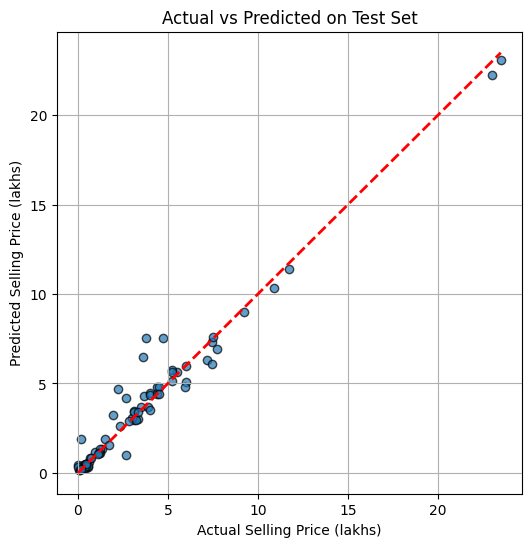

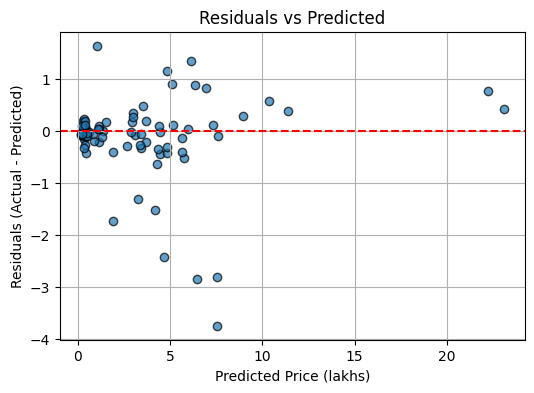

In [256]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# predict
y_pred = model.predict(X_test)

# metrics (works on any sklearn)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"âœ… Test RMSE: {rmse:.3f}")
print(f"âœ… Test RÂ²:   {r2:.3f}")

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price (lakhs)")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("Actual vs Predicted on Test Set")
plt.grid(True)
plt.show()

# Residuals
residuals = (y_test - y_pred)
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price (lakhs)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()
